In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import itertools
from shapely.geometry import Point
from statsmodels.tsa.seasonal import seasonal_decompose


pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None) 
pd.set_option('display.max_colwidth', None)

# City of Chicago Crime Data

## Data Import

Column Name           | Description                                                                                                    | Type
----------------------|--------------------------------------------------------------------------------------------------------------|------
ID                    | Unique identifier for the record.                                                                             | Number
Case Number           | The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.       | Plain Text
Date                  | Date when the incident occurred. This is sometimes a best estimate.                                          | Date & Time
Block                 | The partially redacted address where the incident occurred, placing it on the same block as the actual address. | Plain Text
IUCR                  | The Illinois Uniform Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at link. | Plain Text
Primary Type          | The primary description of the IUCR code.                                                                     | Plain Text
Description           | The secondary description of the IUCR code, a subcategory of the primary description.                         | Plain Text
Location Description  | Description of the location where the incident occurred.                                                      | Plain Text
Arrest                | Indicates whether an arrest was made.                                                                        | Checkbox
Domestic              | Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.       | Checkbox
Beat                  | Indicates the beat where the incident occurred.                                                              | Plain Text
District              | Indicates the police district where the incident occurred.                                                    | Plain Text
Ward                  | The ward (City Council district) where the incident occurred.                                                 | Number
Community Area        | Indicates the community area where the incident occurred. Chicago has 77 community areas.                    | Plain Text
FBI Code              | Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications here. | Plain Text
X Coordinate          | The x-coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block. | Number
Y Coordinate          | The y-coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block. | Number
Year                  | Year the incident occurred.                                                                                   | Number
Updated On            | Date and time the record was last updated.                                                                    | Date & Time
Latitude              | The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block. | Number
Longitude             | The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block. | Number
Location              | The location where the incident occurred in a format that allows for the creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block. | Location

## Data Import

In [13]:
crime_df = pd.read_csv("/Users/rashidbaset/Documents/my-projects/crime-home-price-prediction-capstone/chicago-crime-property-analysis/crime-eda-part2.csv")

## Data Inspection

In [14]:
crime_df.shape

(2388386, 27)

### List of types of key variables

1.  Categorical Variables:
    -   description
    -   location\_description
    -   primary\_type
    -   crime\_category
    -   community
    -   neighborhood
2.  Continuous Variables:
    -   latitude (float64)
    -   longitude (float64)
3.  Ordinal Variables (binary):
    -   domestic (bool)
    -   arrest (bool)
4.  Date-Time Variable:
    -   date (converted from object to datetime)
5.  Integer Variable:
    -   year (int64)

## Data Transformations

### Feature Engineering

#### Neighborhoods

In [15]:
# crime_geometry = [Point(xy) for xy in zip(crime_df['longitude'], crime_df['latitude'])]
# crime_df = gpd.GeoDataFrame(crime_df, geometry=crime_geometry, crs='EPSG:4326')

# neighborhoods = gpd.read_file('/Users/rashidbaset/Documents/my-projects/crime-home-price-prediction-capstone/chicago-property-crime-analysis/boundries-chicago-community.geojson')

# if 'index_left' in crime_df.columns or 'index_right' in crime_df.columns:
#     crime_df = crime_df.rename(columns={'index_left': 'index_left_crime', 'index_right': 'index_right_crime'})

# if 'index_left' in neighborhoods.columns or 'index_right' in neighborhoods.columns:
#     neighborhoods = neighborhoods.rename(columns={'index_left': 'index_left_neigh', 'index_right': 'index_right_neigh'})

# crime_df = gpd.sjoin(crime_df, neighborhoods, op='within', lsuffix='_crime', rsuffix='_neighborhood')


In [16]:
# crime_df.rename(columns={'community_right': 'community'}, inplace=True)

In [17]:
# neighborhood_categories = {
#     "South Side": [
#         "SOUTH SHORE", "AUBURN GRESHAM", "ROSELAND", "CHATHAM", "GREATER GRAND CROSSING",
#         "SOUTH CHICAGO", "CHICAGO LAWN", "ENGLEWOOD", "WEST PULLMAN", "GARFIELD RIDGE",
#         "ASHBURN", "AVALON PARK", "MORGAN PARK", "GRAND BOULEVARD", "WOODLAWN", "SOUTH LAWNDALE",
#         "KENWOOD", "CALUMET HEIGHTS", "DOUGLAS", "GAGE PARK", "WEST ELSDON", "SOUTH DEERING",
#         "HEGEWISCH", "AVALON PARK", "WASHINGTON PARK", "ARMOUR SQUARE", "PULLMAN", "OAKLAND",
#         "FULLER PARK", "BURNSIDE", "RIVERDALE"
#     ],
#     "Southwest Side": [
#         "CLEARING", "WEST LAWN", "WEST ELSDON", "GARFIELD RIDGE",
#         "ARCHER HEIGHTS", "BRIGHTON PARK", "MCKINLEY PARK"
#     ],
#     "Far Southwest Side": [
#         "MOUNT GREENWOOD", "BEVERLY", "WASHINGTON HEIGHTS"
#     ],
#     "Southeast Side": [
#         "HEGEWISCH", "SOUTH DEERING"
#     ],
#     "Central": [
#         "NEAR NORTH SIDE", "LAKE VIEW", "WEST TOWN", "LINCOLN PARK", "NEAR WEST SIDE", "LOOP", "LOGAN SQUARE",
#         "EDGEWATER", "UPTOWN"
#     ],
#     "Far North Side": [
#         "ROGERS PARK", "NORWOOD PARK", "DUNNING", "EDISON PARK", "NORTH PARK"
#     ],
#     "North Side": [
#         "NORTH CENTER", "LAKE VIEW", "LINCOLN PARK", "EDGEWATER", "UPTOWN"
#     ],
#     "Northwest Side": [
#         "PORTAGE PARK", "WEST RIDGE", "IRVING PARK", "ALBANY PARK", "JEFFERSON PARK", "MONTCLARE", "HERMOSA"
#     ],
#     "West Side": [
#         "AUSTIN", "WEST ENGLEWOOD", "BELMONT CRAGIN", "HUMBOLDT PARK", "AVONDALE", "NEW CITY", "CLEARING",
#         "NORTH LAWNDALE", "BRIDGEPORT", "MOUNT GREENWOOD", "FOREST GLEN", "SOUTH LAWNDALE", "KENWOOD",
#         "OHARE", "LOWER WEST SIDE", "EAST GARFIELD PARK", "EAST SIDE", "WEST GARFIELD PARK", "CALUMET HEIGHTS",
#         "DOUGLAS", "WEST ELSDON", "HEGEWISCH", "AVALON PARK", "MCKINLEY PARK", "HERMOSA", "WASHINGTON PARK",
#         "ARMOUR SQUARE", "ARCHER HEIGHTS", "PULLMAN", "OAKLAND", "FULLER PARK", "BURNSIDE", "RIVERDALE"
#     ]
# }


In [18]:
#crime_df['neighborhood'] = crime_df['community'].apply(lambda x: next((k for k, v in neighborhood_categories.items() if x in v), 'Other'))

### Mapping crime incidents types into 6 main categories

In [19]:
# crime_category_mapping = {
#     'Violent Crimes': ['BATTERY', 'ASSAULT', 'ROBBERY', 'HOMICIDE', 'CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', 'KIDNAPPING', 'INTIMIDATION', 'STALKING'],
#     'Property Crimes': ['THEFT', 'CRIMINAL DAMAGE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ARSON'],
#     'Drug-Related Crimes': ['NARCOTICS'],
#     'Deceptive Practices and Fraud': ['DECEPTIVE PRACTICE'],
#     'Public Order Crimes': ['WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'PUBLIC PEACE VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER', 'PROSTITUTION', 'GAMBLING', 'LIQUOR LAW VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION', 'OBSCENITY', 'PUBLIC INDECENCY', 'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'],
#     'Crimes Involving Children': ['OFFENSE INVOLVING CHILDREN']
# }

# crime_df['crime_category'] = crime_df['primary_type'].apply(lambda x: next((k for k, v in crime_category_mapping.items() if x in v), None))

# print(crime_df[['primary_type', 'crime_category']])

### List of types of key variables

1. Categorical Variables:
- description:
description
SIMPLE                                                          265905
DOMESTIC BATTERY SIMPLE                                         221464
$500 AND UNDER                                                  209675
OVER $500                                                       141183
TO VEHICLE                                                      137177
TO PROPERTY                                                     127039
AUTOMOBILE                                                      105218
RETAIL THEFT                                                     75064
FROM BUILDING                                                    65069
FORCIBLE ENTRY                                                   62555
TELEPHONE THREAT                                                 36864
FINANCIAL IDENTITY THEFT OVER $ 300                              35462
UNLAWFUL ENTRY                                                   35171
TO LAND                 

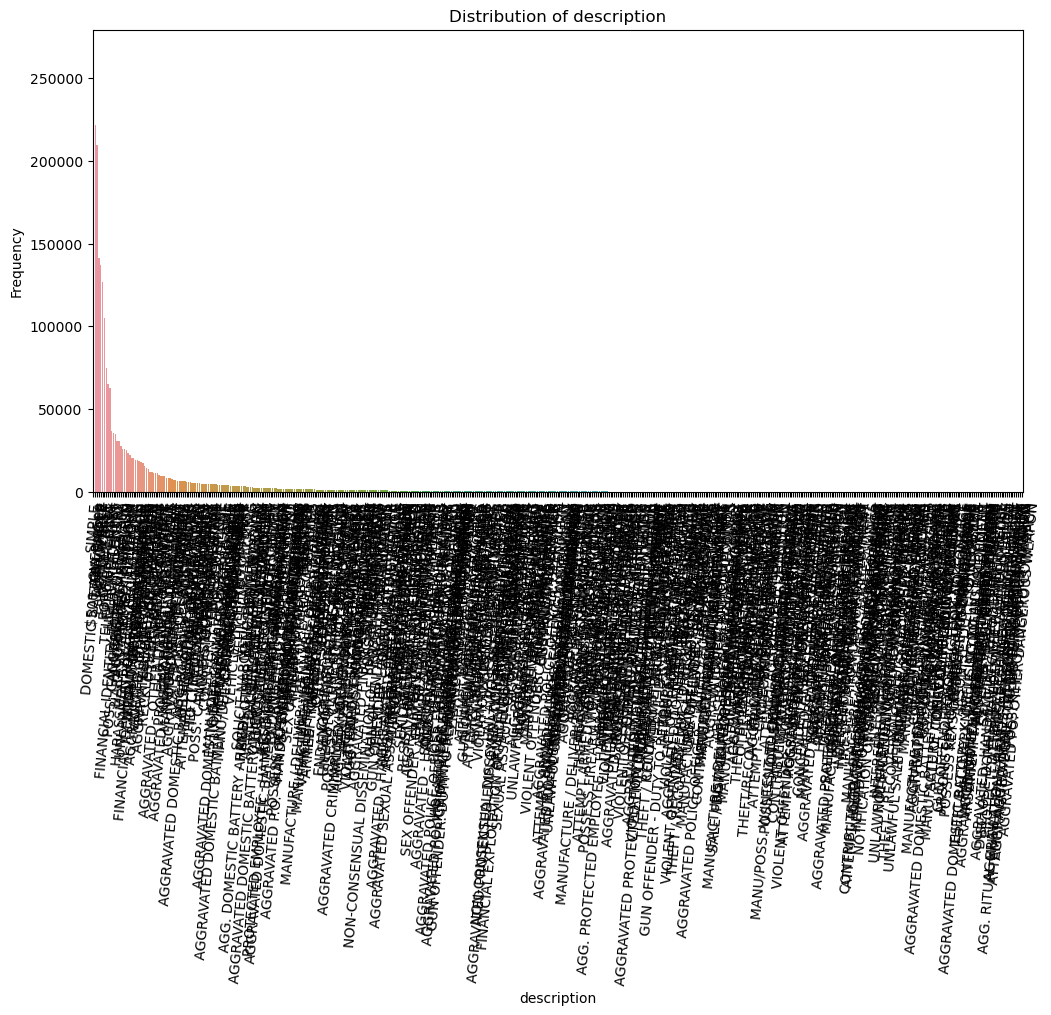

- location_description:
location_description
STREET                                                   595109
RESIDENCE                                                386688
APARTMENT                                                371946
SIDEWALK                                                 187671
OTHER                                                     60213
SMALL RETAIL STORE                                        56196
ALLEY                                                     52127
RESTAURANT                                                43629
PARKING LOT/GARAGE(NON.RESID.)                            43609
VEHICLE NON-COMMERCIAL                                    40068
GAS STATION                                               32419
RESIDENTIAL YARD (FRONT/BACK)                             31750
DEPARTMENT STORE                                          29664
RESIDENCE PORCH/HALLWAY                                   28422
PARKING LOT / GARAGE (NON RESIDENTIAL)                    2

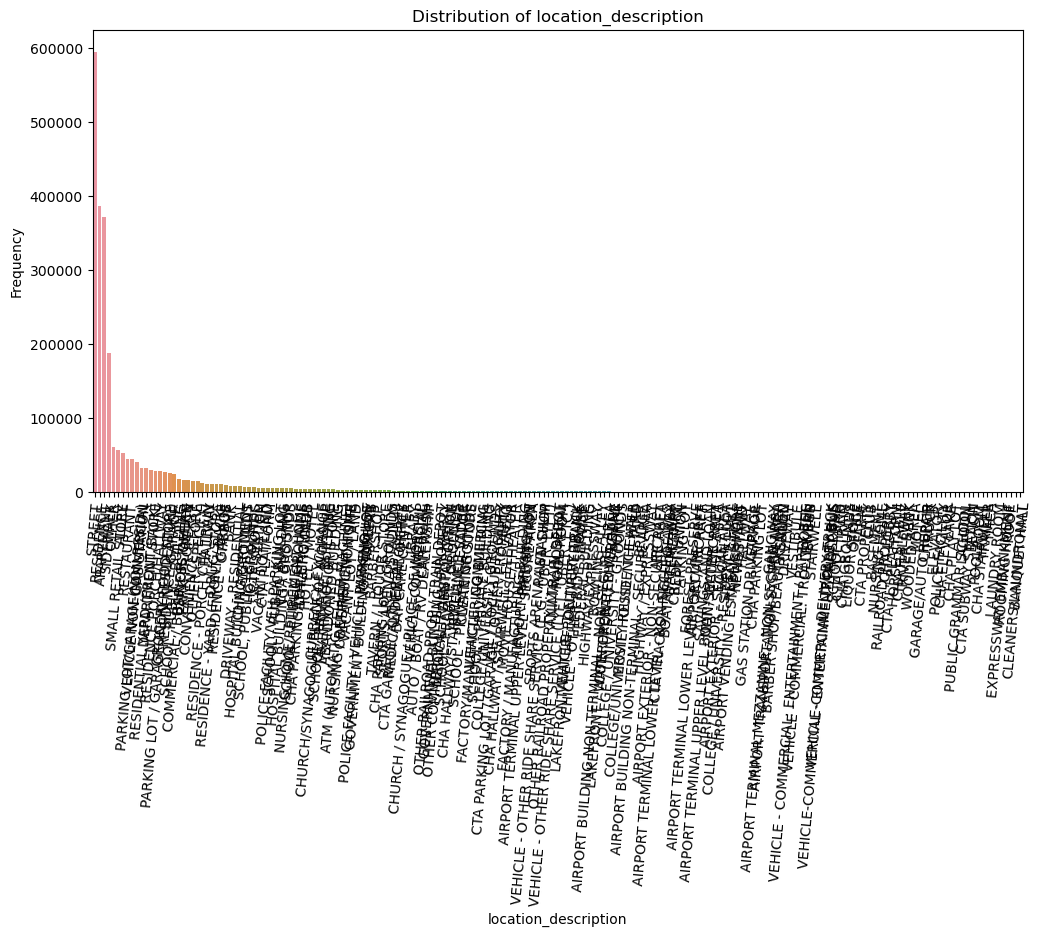

- domestic:
domestic
False    1911493
True      476893
Name: count, dtype: int64


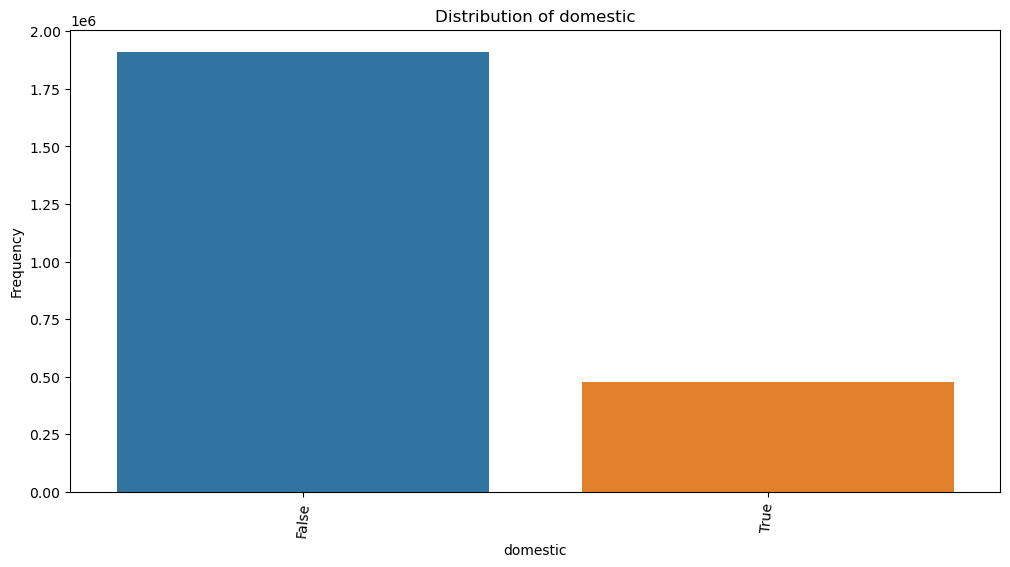

- primary_type:
primary_type
THEFT                                511758
BATTERY                              451813
CRIMINAL DAMAGE                      271173
ASSAULT                              189295
OTHER OFFENSE                        153548
DECEPTIVE PRACTICE                   151898
MOTOR VEHICLE THEFT                  129205
NARCOTICS                            121537
BURGLARY                             104951
ROBBERY                               93657
WEAPONS VIOLATION                     60379
CRIMINAL TRESPASS                     53023
OFFENSE INVOLVING CHILDREN            20340
PUBLIC PEACE VIOLATION                13845
SEX OFFENSE                           10060
INTERFERENCE WITH PUBLIC OFFICER       9299
CRIM SEXUAL ASSAULT                    7384
PROSTITUTION                           6627
CRIMINAL SEXUAL ASSAULT                6535
HOMICIDE                               6424
ARSON                                  4530
STALKING                               2474
LIQ

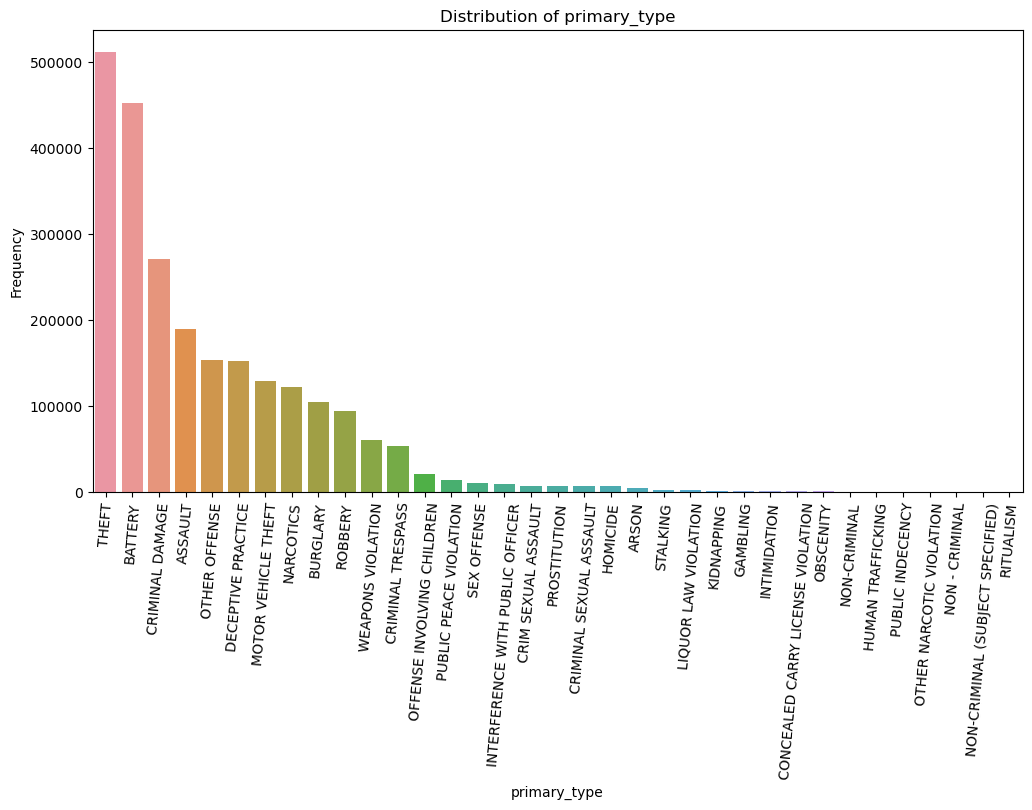

- arrest:
arrest
False    1931313
True      457073
Name: count, dtype: int64


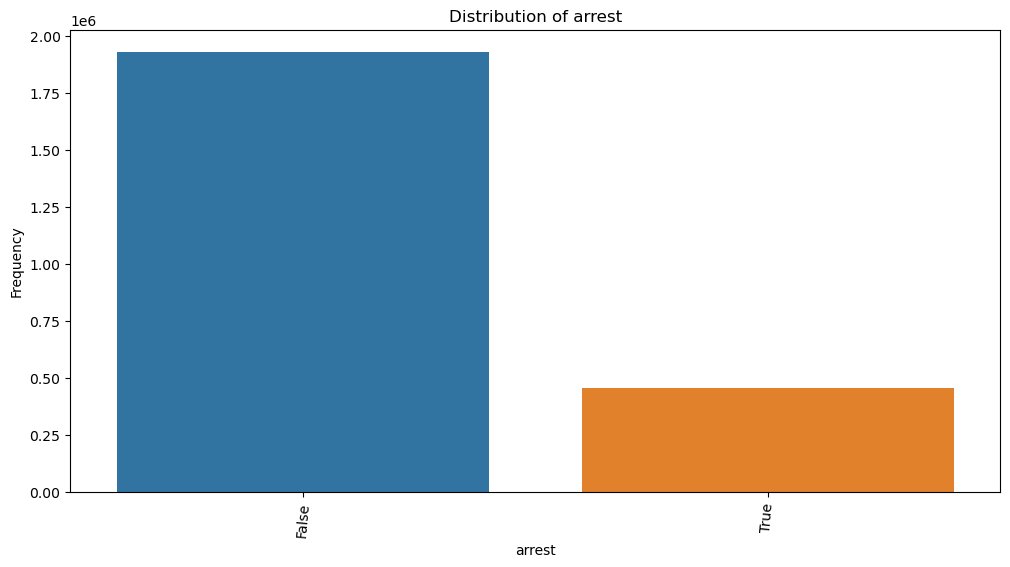

- community:
community
AUSTIN                    144287
NEAR NORTH SIDE           102440
NEAR WEST SIDE             85448
SOUTH SHORE                83794
NORTH LAWNDALE             79264
HUMBOLDT PARK              74804
AUBURN GRESHAM             72778
WEST TOWN                  70738
ROSELAND                   64559
WEST ENGLEWOOD             62771
GREATER GRAND CROSSING     62655
ENGLEWOOD                  59285
CHATHAM                    57741
LAKE VIEW                  54726
CHICAGO LAWN               54669
WEST GARFIELD PARK         50766
EAST GARFIELD PARK         46583
LOGAN SQUARE               46360
BELMONT CRAGIN             44989
SOUTH LAWNDALE             43564
SOUTH CHICAGO              43329
NEW CITY                   41540
LINCOLN PARK               38472
WEST PULLMAN               37757
WOODLAWN                   37022
ROGERS PARK                36426
UPTOWN                     35813
WEST RIDGE                 33193
GRAND BOULEVARD            31491
PORTAGE PARK        

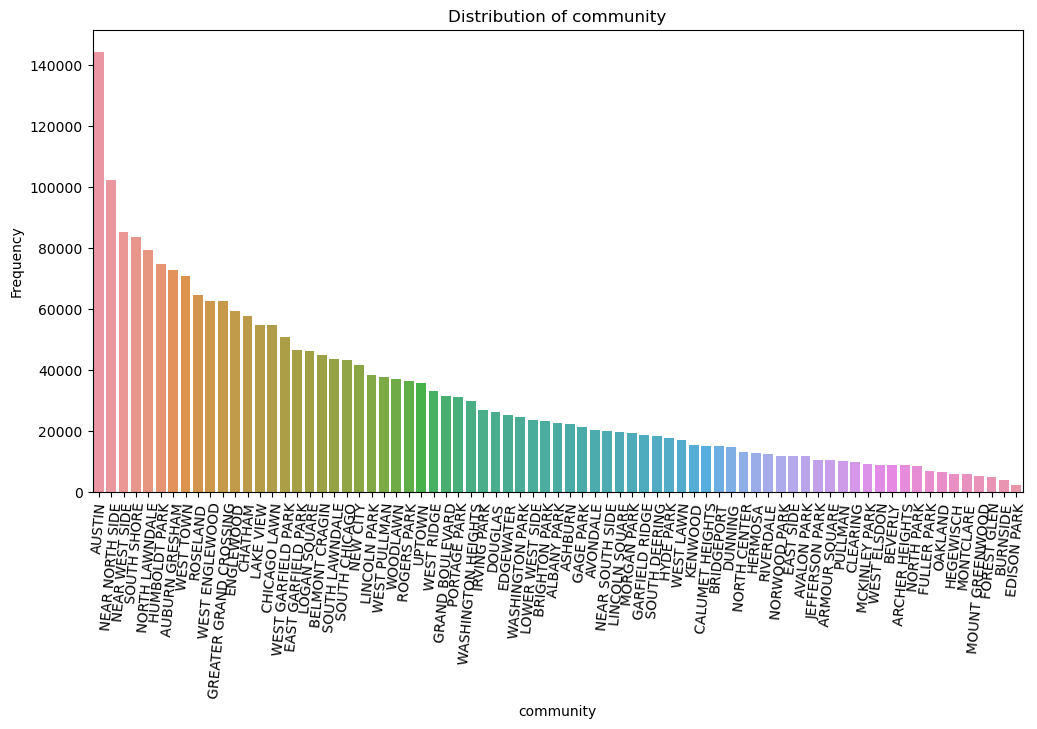

- neighborhood:
neighborhood
South Side            907766
West Side             620961
Central               459346
Northwest Side        143116
Far North Side         74216
Southwest Side         68190
Other                  57583
Far Southwest Side     44045
North Side             13163
Name: count, dtype: int64


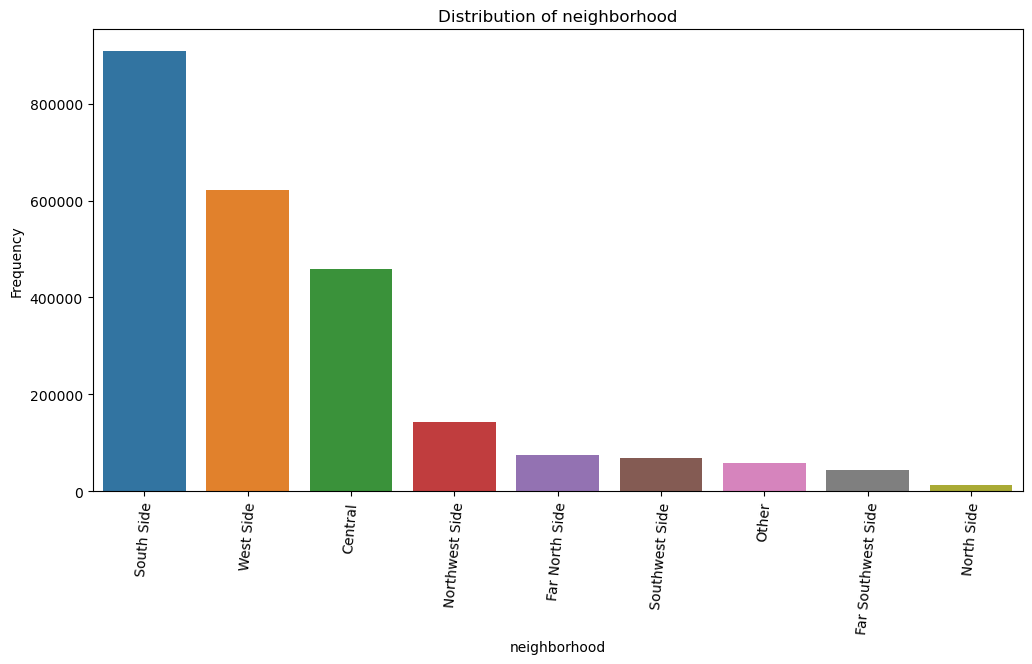

- crime_category:
crime_category
Property Crimes                  1021617
Violent Crimes                    760634
Deceptive Practices and Fraud     151898
Public Order Crimes               148751
Drug-Related Crimes               121537
Crimes Involving Children          20340
Name: count, dtype: int64


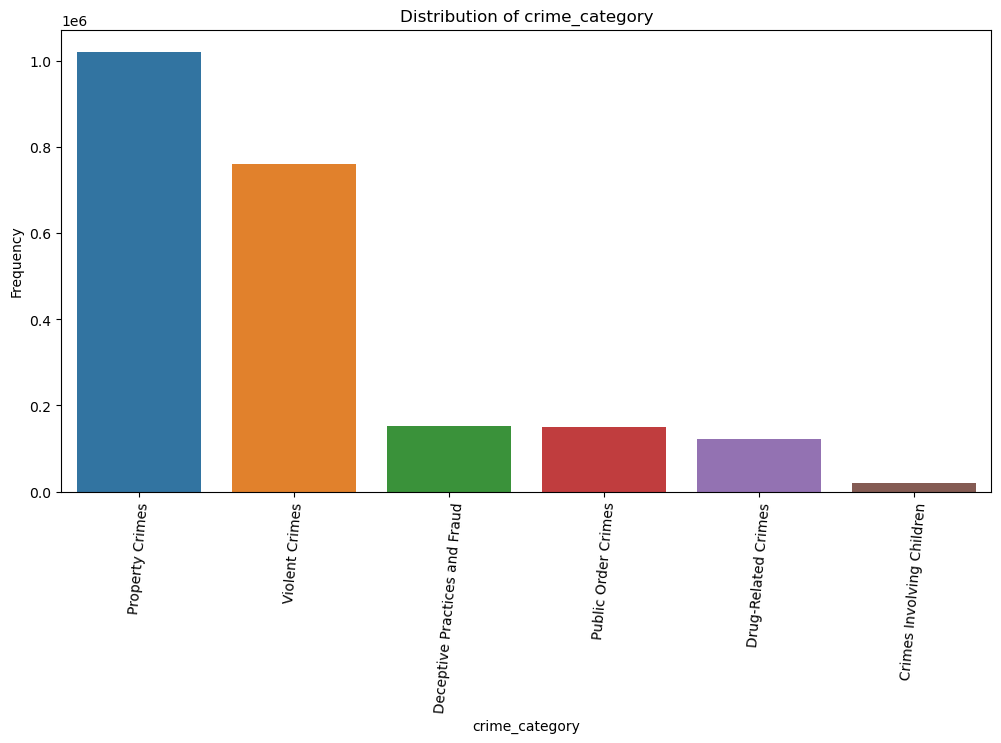

2. Continuous Variables:


/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


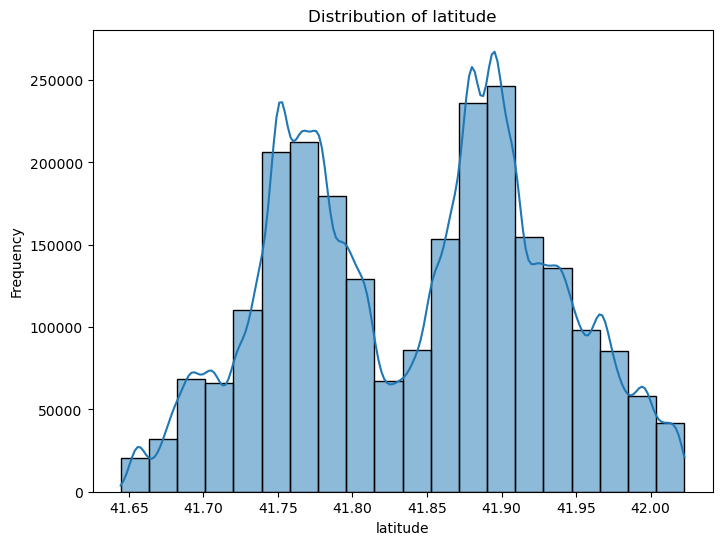

/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


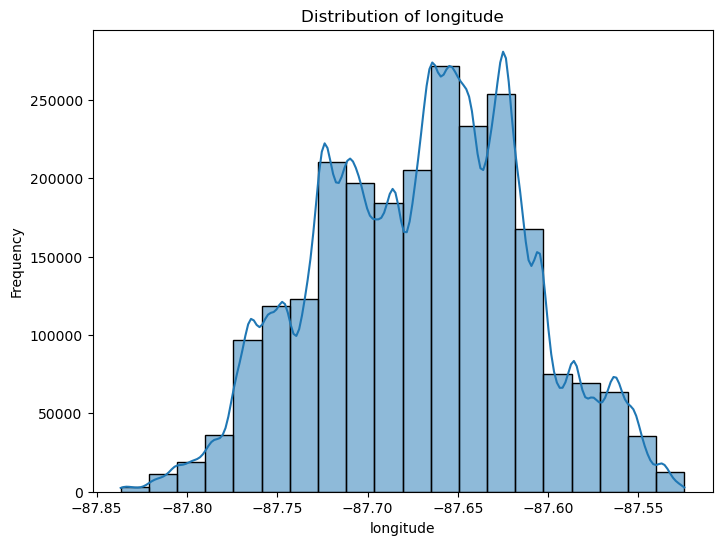

3. Ordinal Variables (binary):
4. Date-Time Variable:
- date (converted from object to datetime)
5. Integer Variables:
- year:
count    2.388386e+06
mean     2.018342e+03
std      2.900167e+00
min      2.014000e+03
25%      2.016000e+03
50%      2.018000e+03
75%      2.021000e+03
max      2.023000e+03
Name: year, dtype: float64

Summary Statistics for Numeric Variables:
           latitude     longitude          year
count  2.388386e+06  2.388386e+06  2.388386e+06
mean   4.184118e+01 -8.767029e+01  2.018342e+03
std    8.711042e-02  5.736889e-02  2.900167e+00
min    4.164459e+01 -8.783669e+01  2.014000e+03
25%    4.176608e+01 -8.771357e+01  2.016000e+03
50%    4.185457e+01 -8.766569e+01  2.018000e+03
75%    4.190679e+01 -8.762820e+01  2.021000e+03
max    4.202259e+01 -8.752453e+01  2.023000e+03


In [11]:
categorical_vars = ['description', 'location_description', 'domestic', 'primary_type', 'arrest', 'community', 'neighborhood', 'crime_category']
continuous_vars = ['latitude', 'longitude']
ordinal_vars = []
date_time_var = 'date'
integer_vars = ['year']


print("1. Categorical Variables:")
for var in categorical_vars:
    category_counts = crime_df[var].value_counts()
    print(f"- {var}:")
    print(category_counts)

    plt.figure(figsize=(12, 6))
    sns.countplot(data=crime_df, x=var, order=category_counts.index)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(rotation=85)
    plt.show()

print("2. Continuous Variables:")
for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(crime_df[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

print("3. Ordinal Variables (binary):")
for var in ordinal_vars:
    percentage_true = (crime_df[var].sum() / len(crime_df)) * 100
    print(f"- {var}: Percentage of True values: {percentage_true:.2f}%")

crime_df['date'] = pd.to_datetime(crime_df['date'])

print("4. Date-Time Variable:")
print("- date (converted from object to datetime)")

print("5. Integer Variables:")
for var in integer_vars:
    print(f"- {var}:")
    print(crime_df[var].describe())

numeric_vars = continuous_vars + integer_vars
print("\nSummary Statistics for Numeric Variables:")
print(crime_df[numeric_vars].describe())

## Understanding Chicago's Crime Landscape

### Crime Overview

### Monthly crime trends

/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


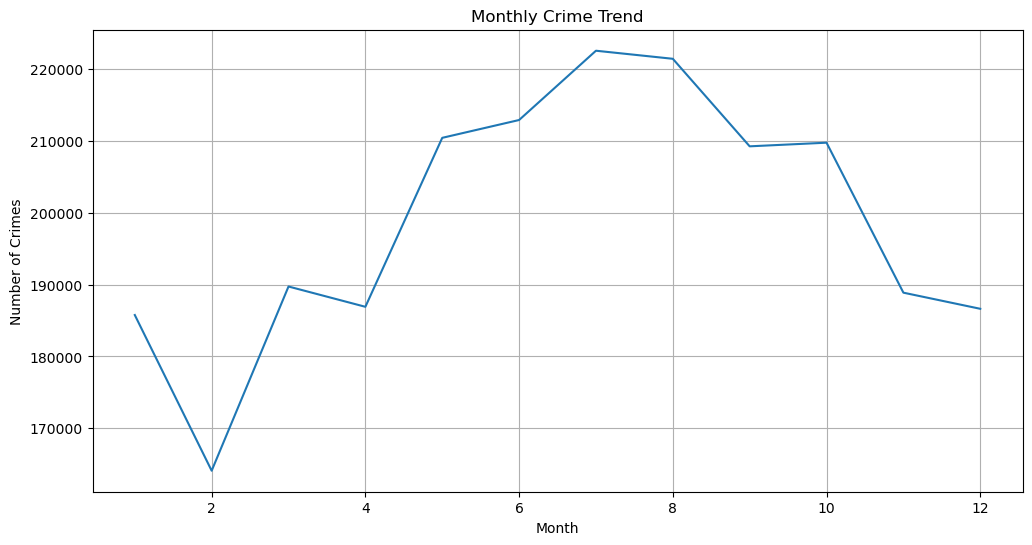

In [4]:
crime_df['date'] = pd.to_datetime(crime_df['date'])  # Convert 'date' column to datetime format
crime_df['Month'] = crime_df['date'].dt.month

monthly_crime_counts = crime_df['Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_crime_counts.index, y=monthly_crime_counts.values)
plt.title('Monthly Crime Trend')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

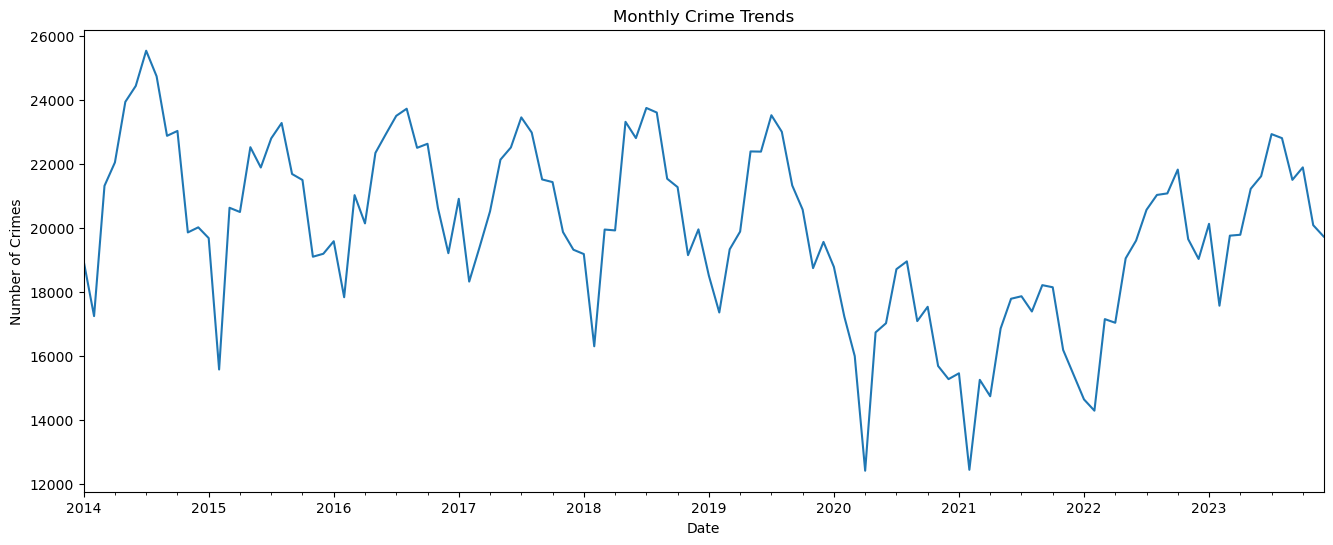

In [5]:
crime_df.set_index('date', inplace=True)

# Resample to a specific time frequency (e.g., monthly)
monthly_crime = crime_df.resample('M').size()

# Plot time series
plt.figure(figsize=(16, 6))
monthly_crime.plot()
plt.title('Monthly Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.show()

# Resetting the index to bring back 'date' as a column
crime_df.reset_index(inplace=True)

/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


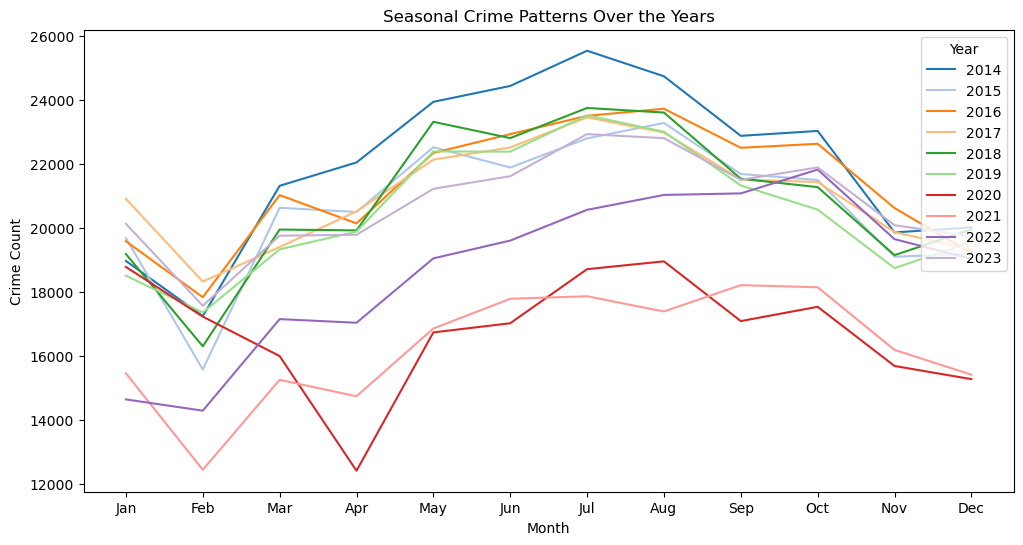

In [6]:
crime_df['year'] = crime_df['date'].dt.year
crime_df['month'] = crime_df['date'].dt.month

monthly_crime_counts = crime_df.groupby(['year', 'month']).size().reset_index(name='crime_count')

custom_palette = sns.color_palette("tab20", len(monthly_crime_counts['year'].unique()))

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_crime_counts, x='month', y='crime_count', hue='year', palette=custom_palette)
plt.title('Seasonal Crime Patterns Over the Years')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.legend(title='Year', loc='upper right')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Yearly crime trends

/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


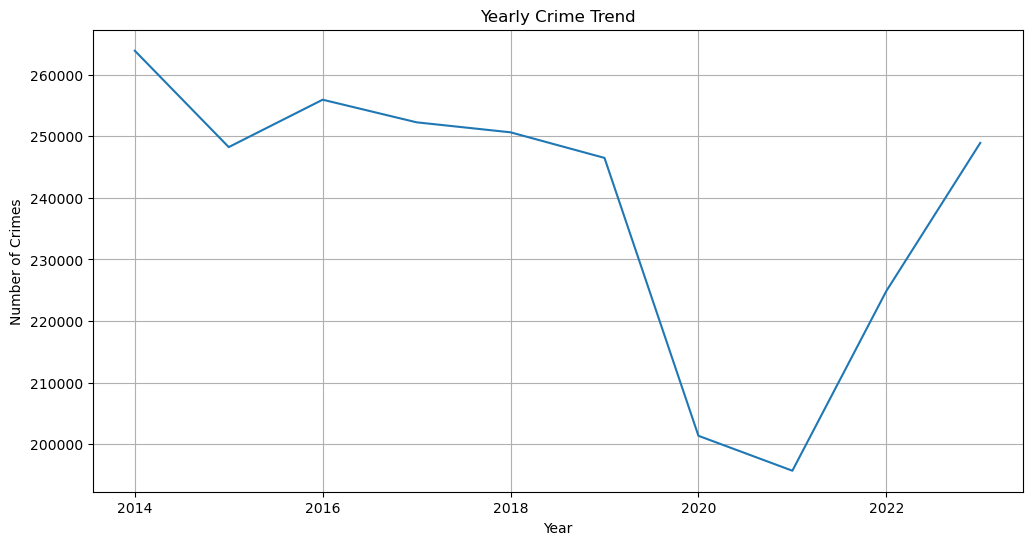

In [7]:
yearly_crime_counts = crime_df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_crime_counts.index, y=yearly_crime_counts.values)
plt.title('Yearly Crime Trend')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

### Day of the week and hourly

/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_34782/2895524155.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_pandemic_data['DayOfWeek'] = pre_pandemic_data['date'].dt.day_name()
/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_34782/2895524155.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_pandemic_data['HourOfDay'] = pre_pandemic_data['date'].dt.hour
/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_34782/2895524155.py:13: SettingWithCopyWarning: 
A valu

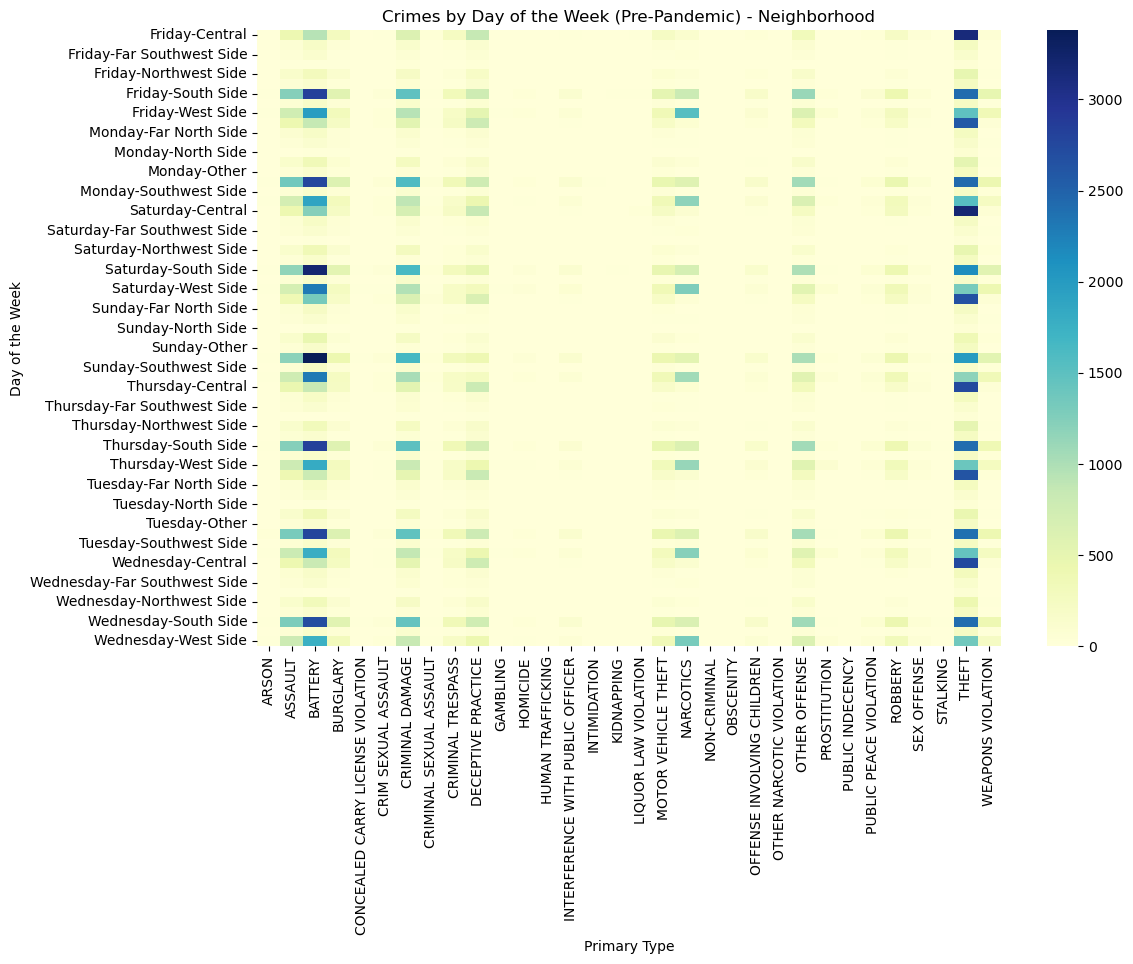

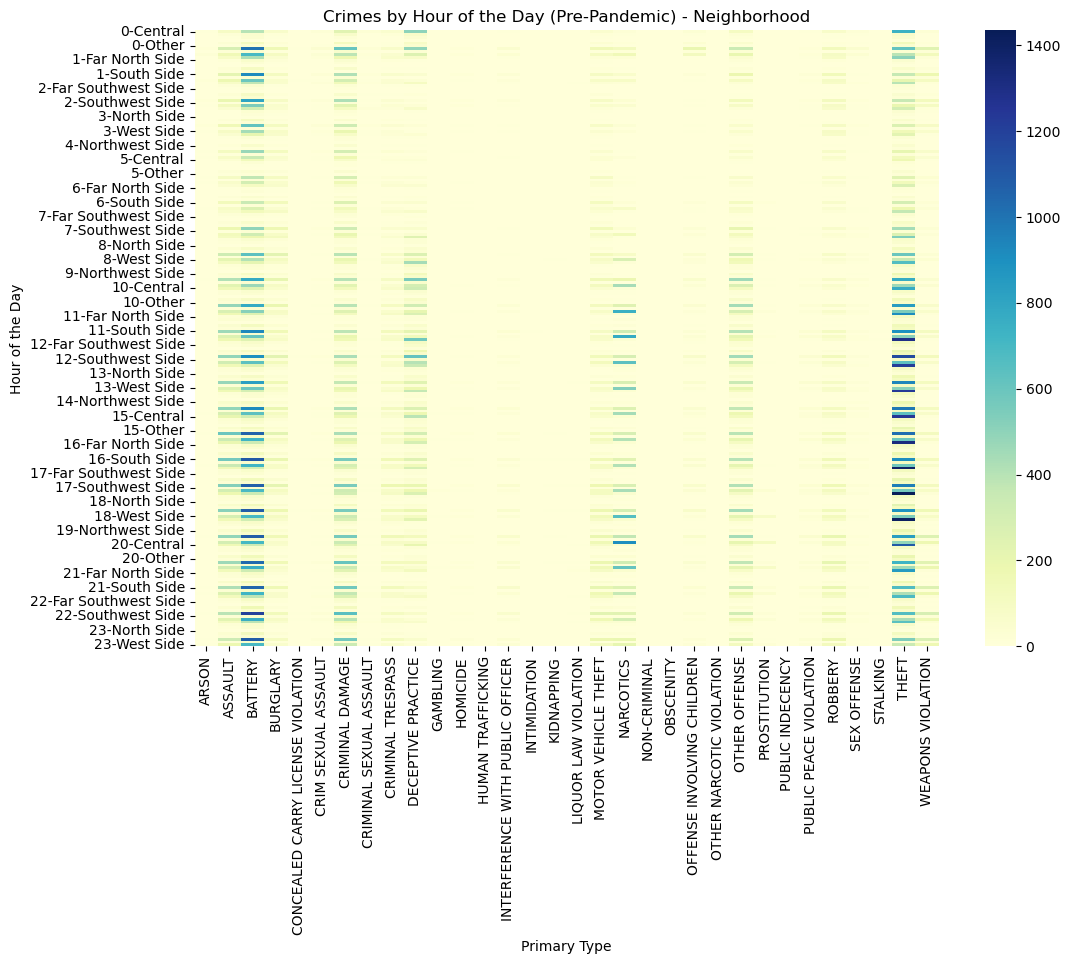

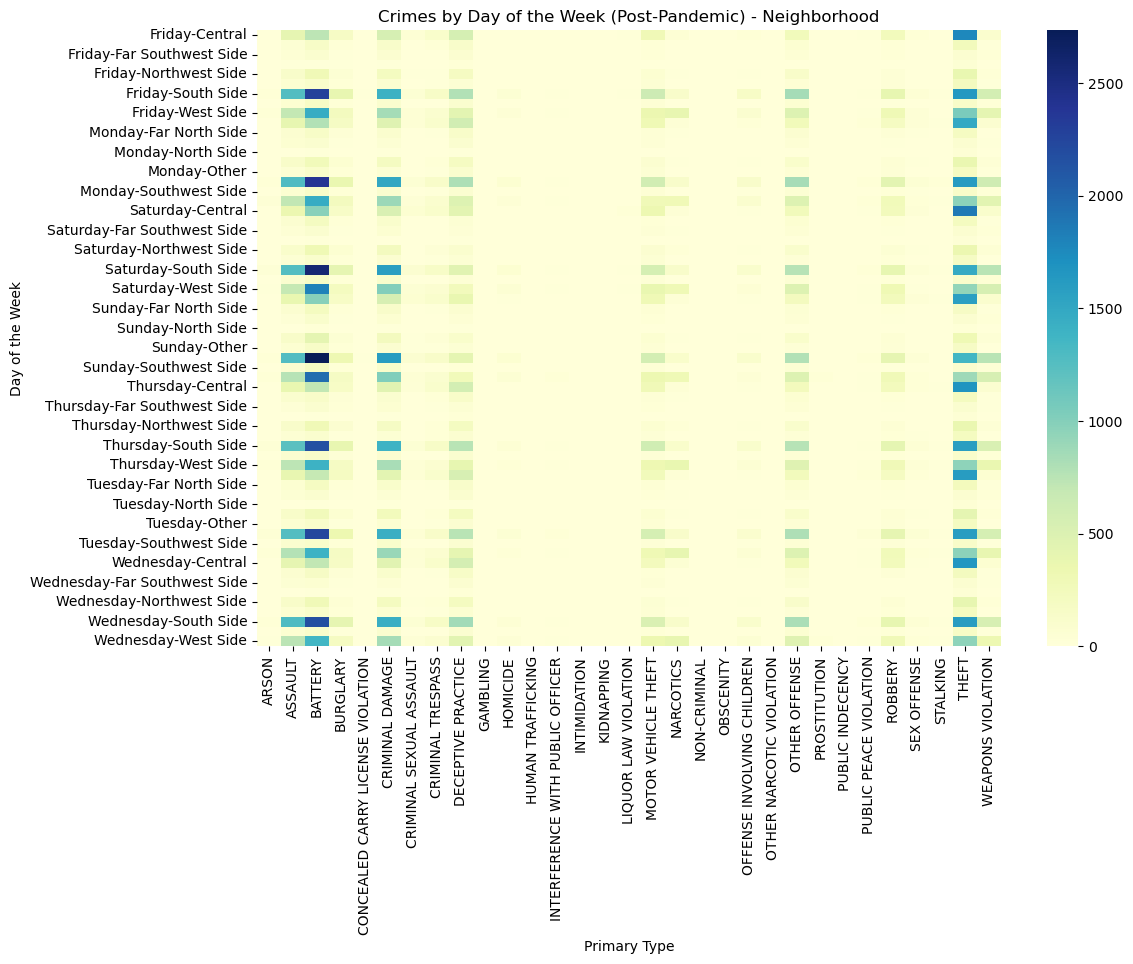

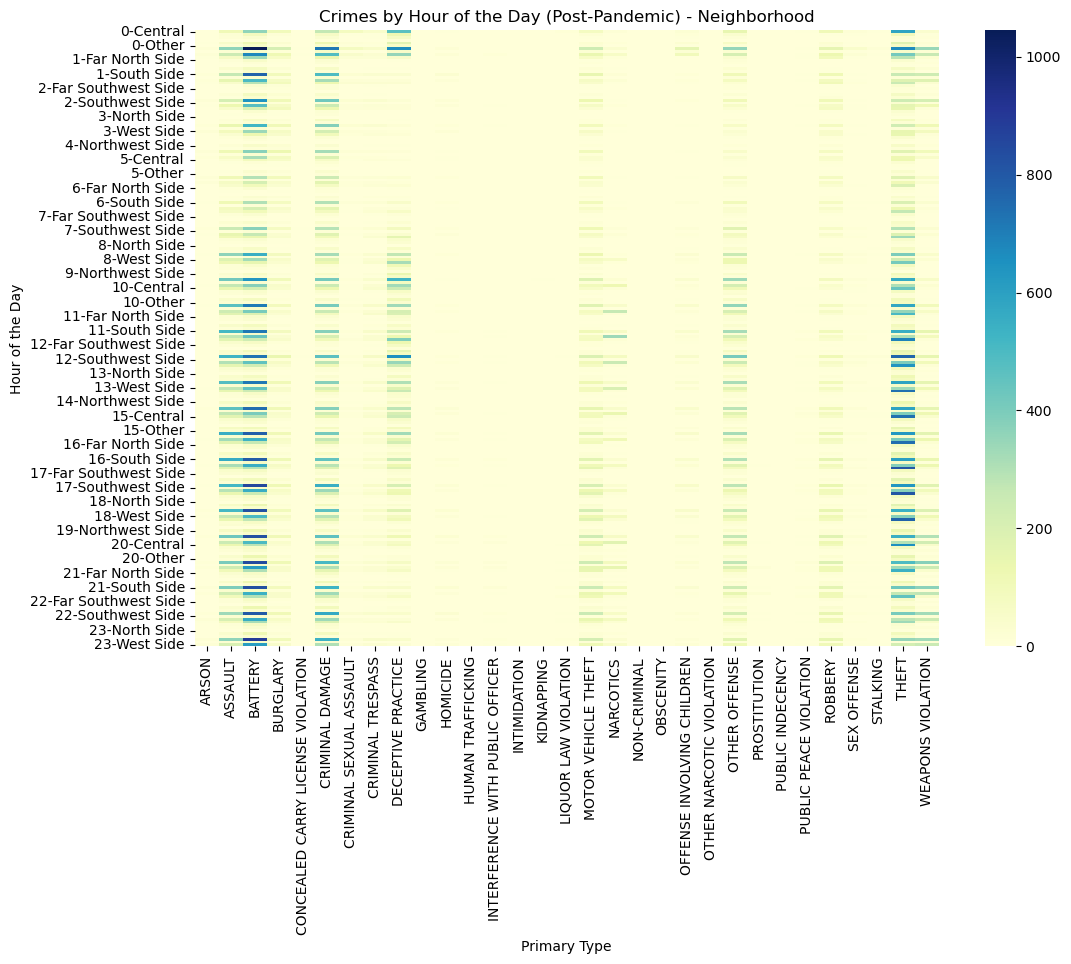

In [8]:
pre_pandemic_start = pd.to_datetime('2019-01-01')
pre_pandemic_end = pd.to_datetime('2019-12-31')

post_pandemic_start = pd.to_datetime('2021-01-01')  
post_pandemic_end = pd.to_datetime('2021-12-31')

pre_pandemic_data = crime_df[(crime_df['date'] >= pre_pandemic_start) & (crime_df['date'] <= pre_pandemic_end)]
post_pandemic_data = crime_df[(crime_df['date'] >= post_pandemic_start) & (crime_df['date'] <= post_pandemic_end)]

pre_pandemic_data['DayOfWeek'] = pre_pandemic_data['date'].dt.day_name()
pre_pandemic_data['HourOfDay'] = pre_pandemic_data['date'].dt.hour

post_pandemic_data['DayOfWeek'] = post_pandemic_data['date'].dt.day_name()
post_pandemic_data['HourOfDay'] = post_pandemic_data['date'].dt.hour

day_of_week_crimes_pre_pandemic = pre_pandemic_data.groupby(['DayOfWeek', 'neighborhood', 'primary_type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(day_of_week_crimes_pre_pandemic, cmap='YlGnBu', annot=False)  # Set annot=False to eliminate values
plt.title('Crimes by Day of the Week (Pre-Pandemic) - Neighborhood')
plt.xlabel('Primary Type')
plt.ylabel('Day of the Week')
plt.xticks(rotation=90)
plt.show()

hour_of_day_crimes_pre_pandemic = pre_pandemic_data.groupby(['HourOfDay', 'neighborhood', 'primary_type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(hour_of_day_crimes_pre_pandemic, cmap='YlGnBu', annot=False)  # Set annot=False to eliminate values
plt.title('Crimes by Hour of the Day (Pre-Pandemic) - Neighborhood')
plt.xlabel('Primary Type')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=90)
plt.show()

day_of_week_crimes_post_pandemic = post_pandemic_data.groupby(['DayOfWeek', 'neighborhood', 'primary_type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(day_of_week_crimes_post_pandemic, cmap='YlGnBu', annot=False)  # Set annot=False to eliminate values
plt.title('Crimes by Day of the Week (Post-Pandemic) - Neighborhood')
plt.xlabel('Primary Type')
plt.ylabel('Day of the Week')
plt.xticks(rotation=90)
plt.show()

hour_of_day_crimes_post_pandemic = post_pandemic_data.groupby(['HourOfDay', 'neighborhood', 'primary_type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(hour_of_day_crimes_post_pandemic, cmap='YlGnBu', annot=False)  # Set annot=False to eliminate values
plt.title('Crimes by Hour of the Day (Post-Pandemic) - Neighborhood')
plt.xlabel('Primary Type')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=90)
plt.show()

## Continued from EDA-crime.ipynb notebook

## Crime Distribution and Characteristics

### Top 10 crime type trends over time

/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rashidbaset/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


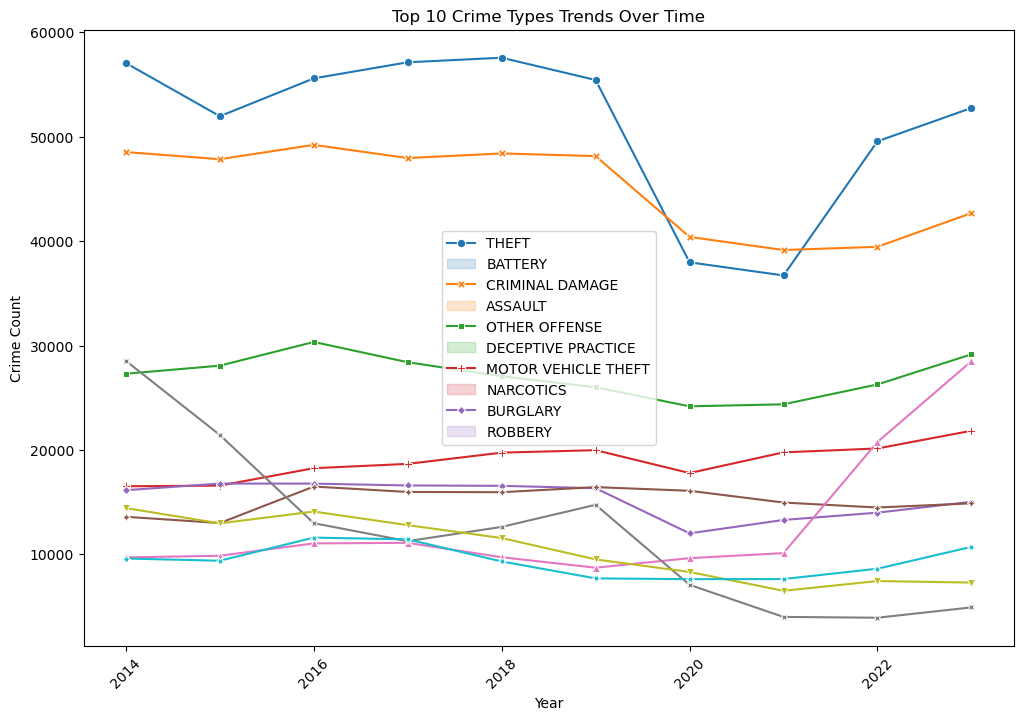

In [3]:
crime_type_counts = crime_df.groupby(['primary_type', 'year']).size().reset_index(name='crime_count')

pivot_table = crime_type_counts.pivot(index='primary_type', columns='year', values='crime_count').fillna(0)

top_n = 10 # top N crime types
top_crime_types = pivot_table.sum(axis=1).sort_values(ascending=False).head(top_n).index
top_crimes = pivot_table.loc[top_crime_types]

plt.figure(figsize=(12, 8))
sns.lineplot(data=top_crimes.T, dashes=False, markers=True)
plt.title(f'Top {top_n} Crime Types Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.legend(top_crime_types)
plt.xticks(rotation=45)
plt.show()

### Distribution of crimes across categories

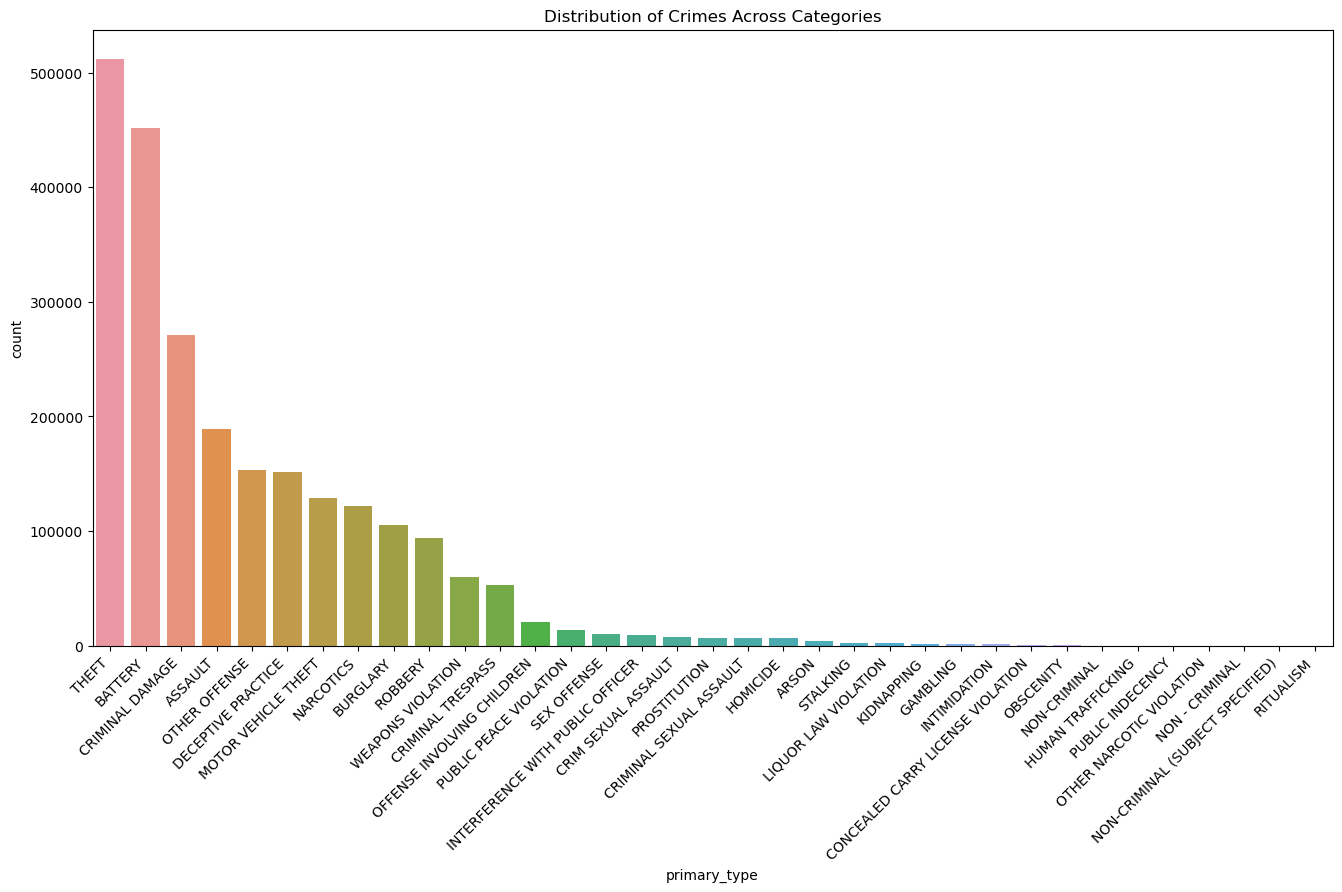

In [4]:
plt.figure(figsize=(16, 8))
sns.countplot(x='primary_type', data=crime_df, order=crime_df['primary_type'].value_counts().index)
plt.title('Distribution of Crimes Across Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

### Distribution of crimes accross communities

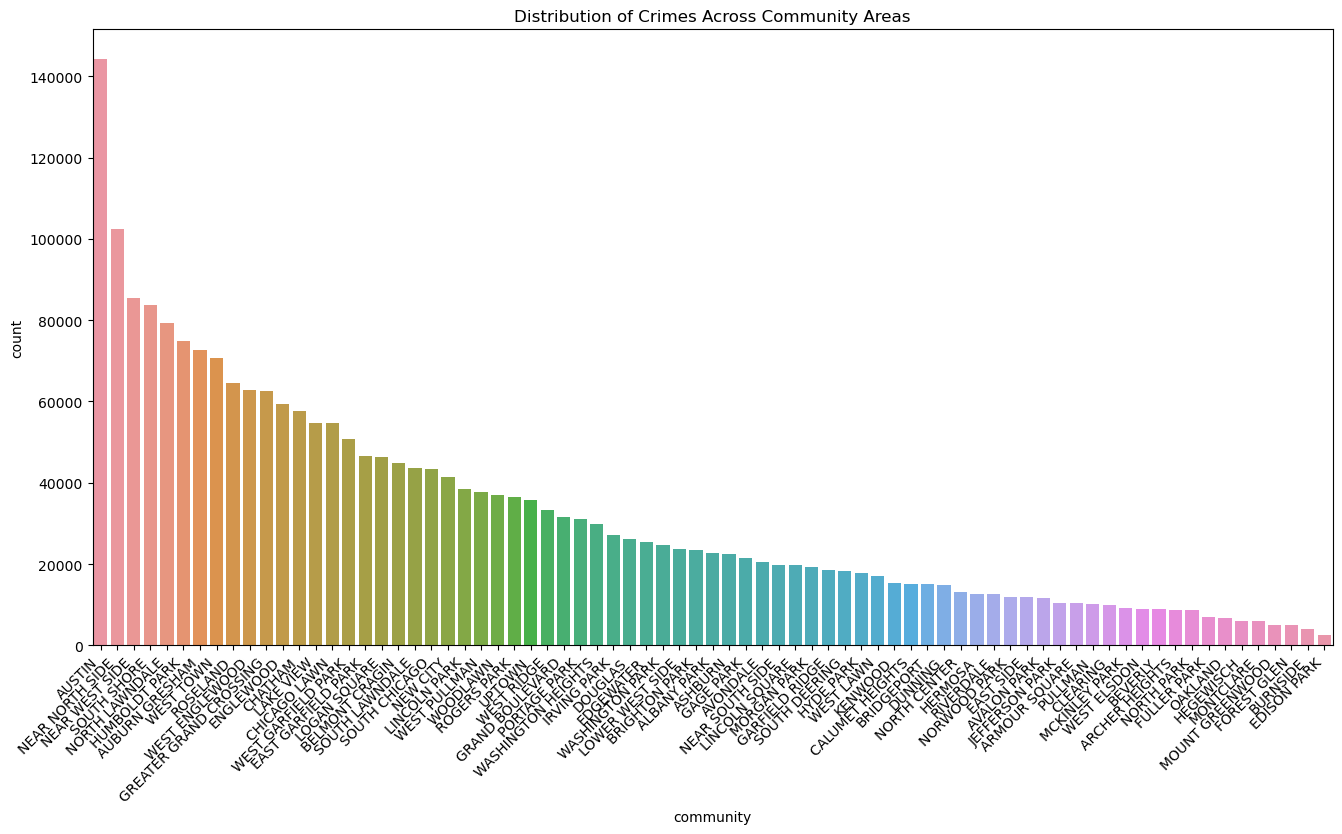

In [5]:
plt.figure(figsize=(16, 8))
sns.countplot(x='community', data=crime_df, order=crime_df['community'].value_counts().index)
plt.title('Distribution of Crimes Across Community Areas')
plt.xticks(rotation=45, ha='right')
plt.show()

### Crimes by neighborhood and crime category heatmap (pre and post pandemic

/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_13270/696155494.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_pandemic_data['DayOfWeek'] = pre_pandemic_data['date'].dt.day_name()
/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_13270/696155494.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_pandemic_data['HourOfDay'] = pre_pandemic_data['date'].dt.hour
/var/folders/pp/77rpffxd5pl6p9fys4m6t7y00000gn/T/ipykernel_13270/696155494.py:15: SettingWithCopyWarning: 
A value i

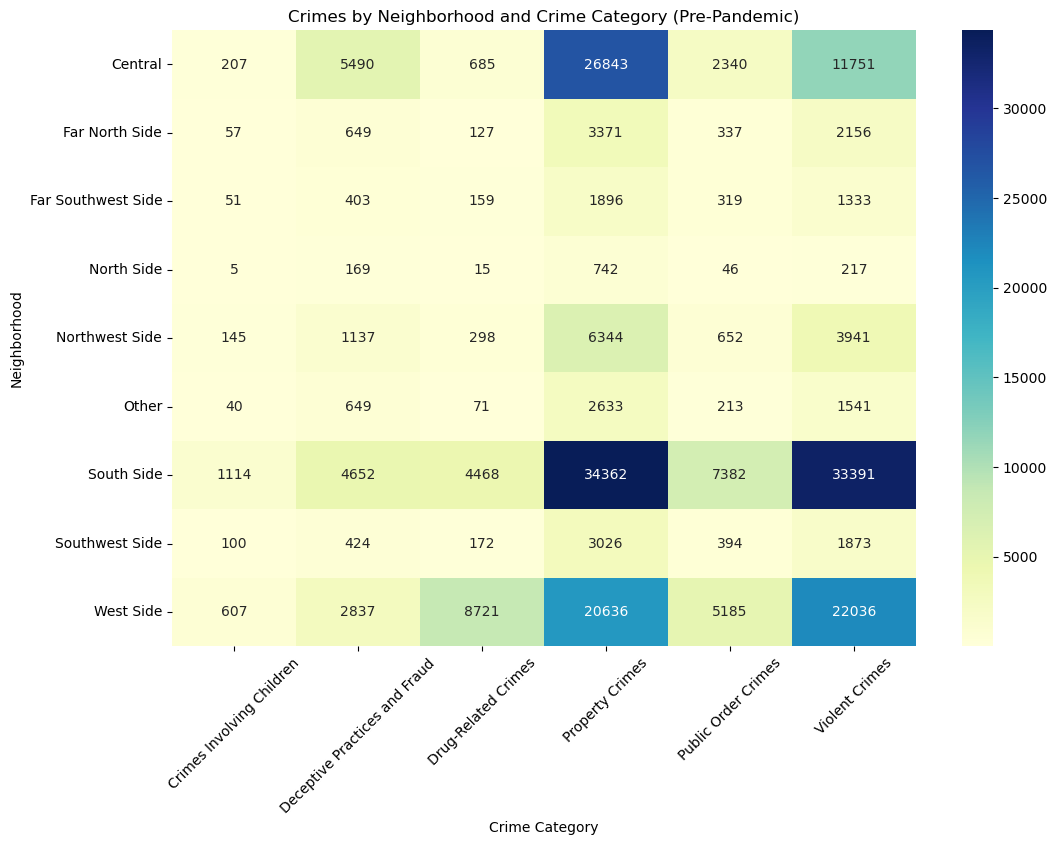

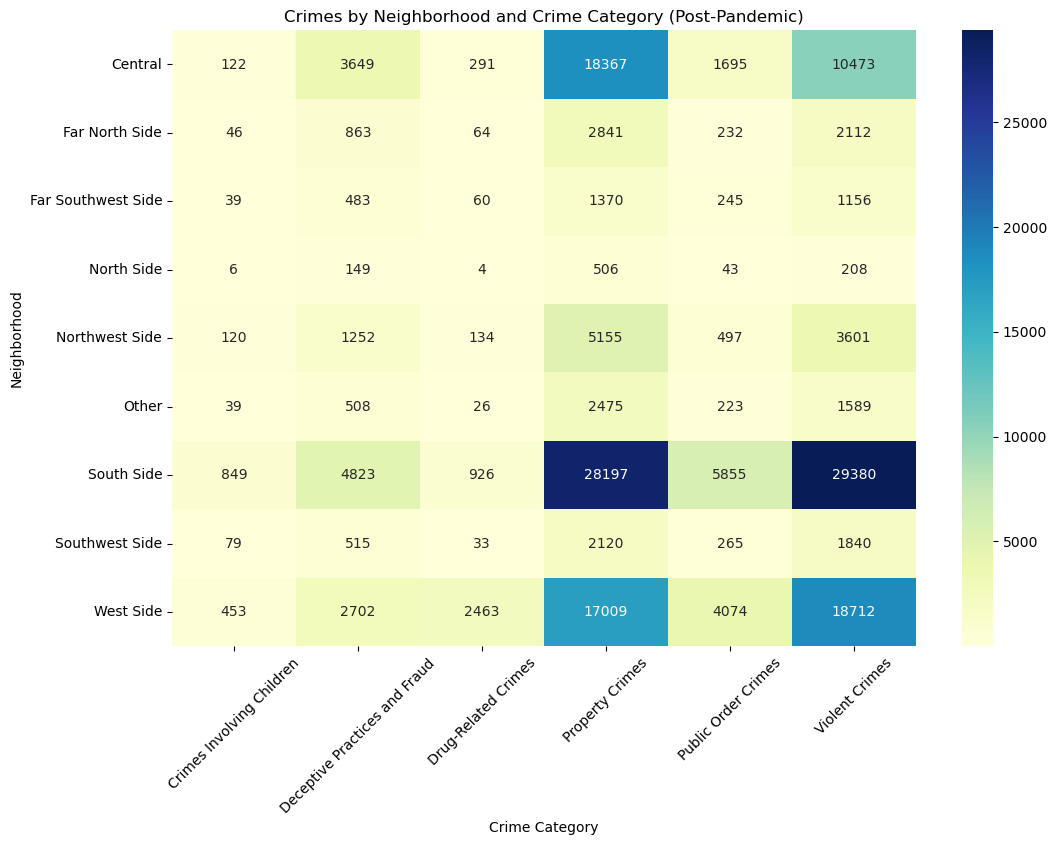

In [10]:
crime_df['date'] = pd.to_datetime(crime_df['date'])

pre_pandemic_start = pd.to_datetime('2019-01-01')
pre_pandemic_end = pd.to_datetime('2019-12-31')

post_pandemic_start = pd.to_datetime('2021-01-01')  
post_pandemic_end = pd.to_datetime('2021-12-31')

pre_pandemic_data = crime_df[(crime_df['date'] >= pre_pandemic_start) & (crime_df['date'] <= pre_pandemic_end)]
post_pandemic_data = crime_df[(crime_df['date'] >= post_pandemic_start) & (crime_df['date'] <= post_pandemic_end)]

pre_pandemic_data['DayOfWeek'] = pre_pandemic_data['date'].dt.day_name()
pre_pandemic_data['HourOfDay'] = pre_pandemic_data['date'].dt.hour

post_pandemic_data['DayOfWeek'] = post_pandemic_data['date'].dt.day_name()
post_pandemic_data['HourOfDay'] = post_pandemic_data['date'].dt.hour

pre_pandemic_grouped = pre_pandemic_data.groupby(['neighborhood', 'crime_category']).size().unstack(fill_value=0)
post_pandemic_grouped = post_pandemic_data.groupby(['neighborhood', 'crime_category']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pre_pandemic_grouped, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Crimes by Neighborhood and Crime Category (Pre-Pandemic)')
plt.xlabel('Crime Category')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(post_pandemic_grouped, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Crimes by Neighborhood and Crime Category (Post-Pandemic)')
plt.xlabel('Crime Category')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45)
plt.show()

### Crime Percent change year over year by community area

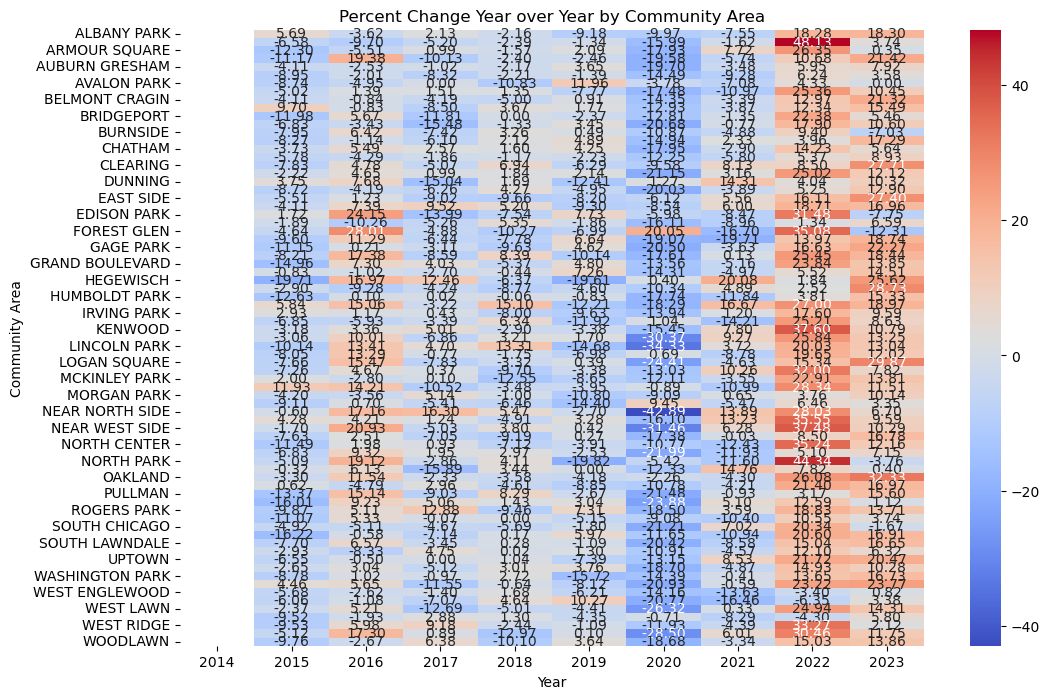

In [11]:
crime_counts = crime_df.groupby(['community', 'year']).size().reset_index(name='crime_count')

pivot_table = crime_counts.pivot(index='community', columns='year', values='crime_count')

percent_changes = pivot_table.pct_change(axis='columns') * 100

plt.figure(figsize=(12, 8))
sns.heatmap(percent_changes, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title('Percent Change Year over Year by Community Area')
plt.xlabel('Year')
plt.ylabel('Community Area')
plt.show()

### Crime percent year over year by neighborhood

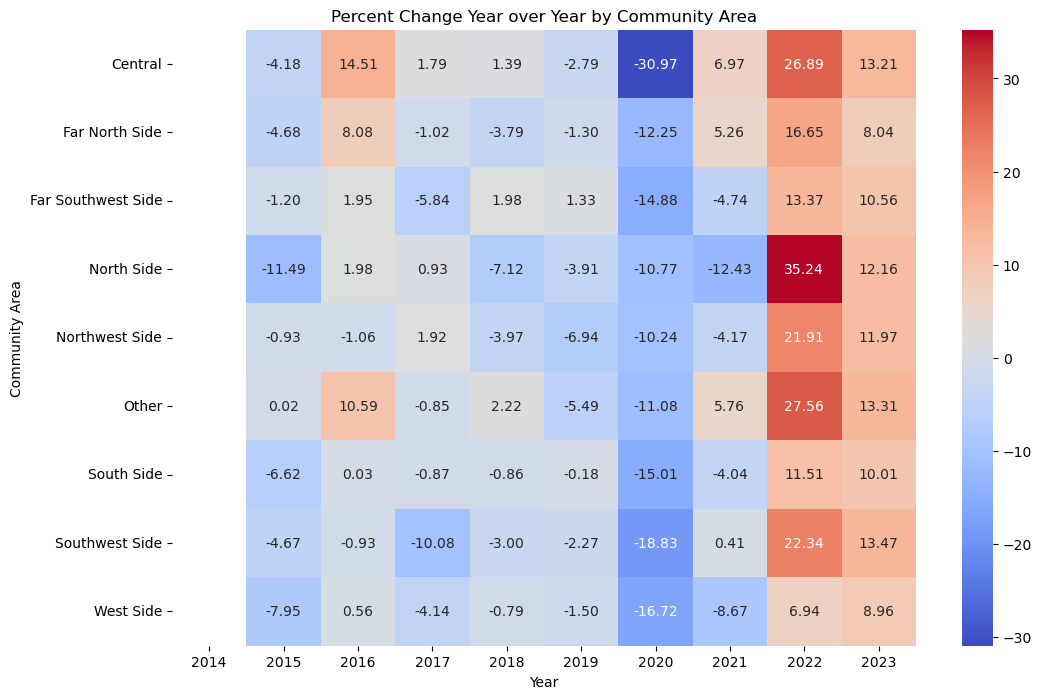

NameError: name 'ax' is not defined

In [12]:
crime_counts = crime_df.groupby(['neighborhood', 'year']).size().reset_index(name='crime_count')

pivot_table = crime_counts.pivot(index='neighborhood', columns='year', values='crime_count')

percent_changes = pivot_table.pct_change(axis='columns') * 100

plt.figure(figsize=(12, 8))
sns.heatmap(percent_changes, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title('Percent Change Year over Year by Community Area')
plt.xlabel('Year')
plt.ylabel('Community Area')
plt.show()

cbar = ax.collections[0].colorbar
cbar.set_ticks(cbar.get_ticks())
cbar.set_ticklabels([f"{int(x)}%" for x in cbar.get_ticks()])  

plt.tight_layout() 
plt.show()

### Map of monthly average per capita (100,000) crime for each crime category

In [13]:
monthly_avg_crime_2023 = pd.read_csv("monthly-avg-cap-crime-2023.csv")

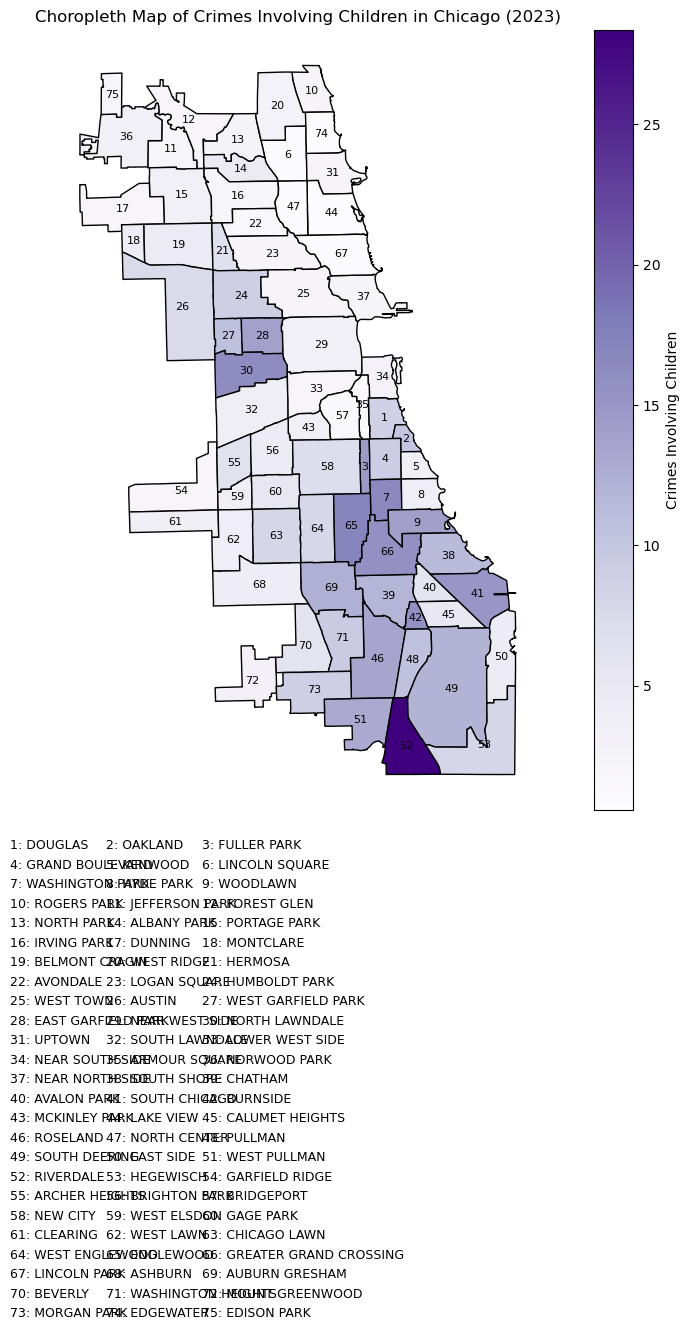

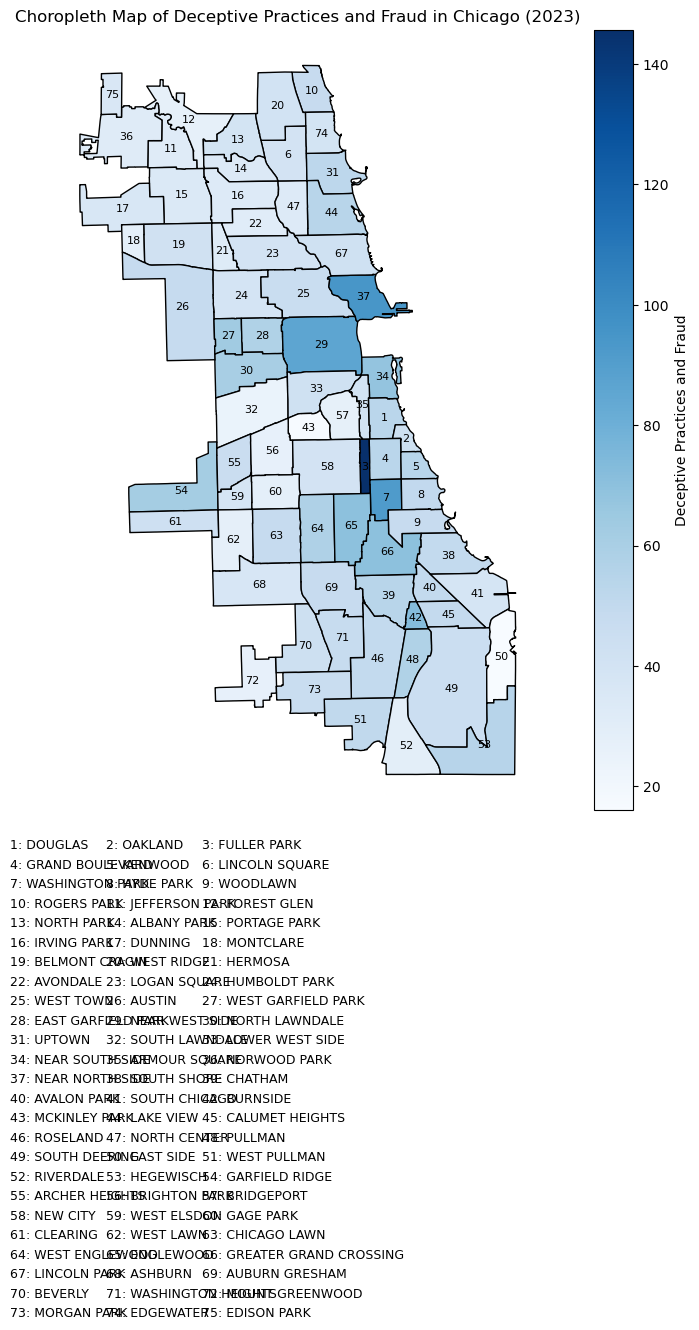

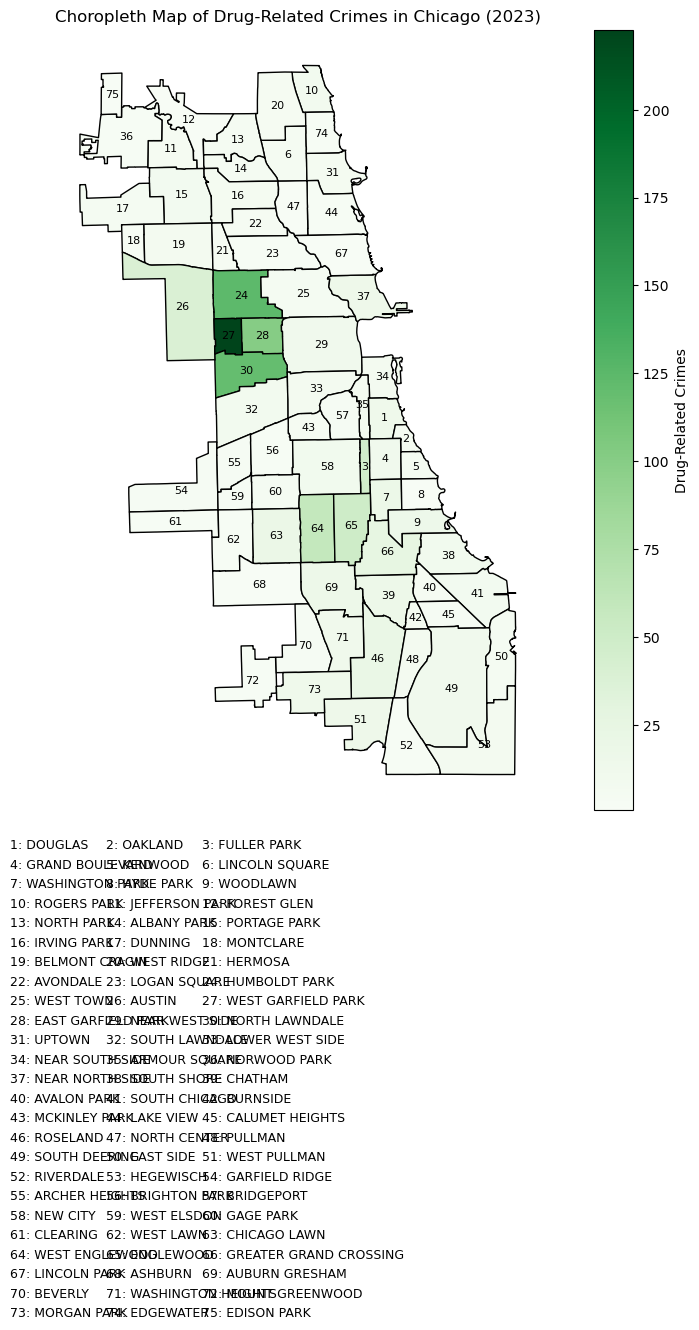

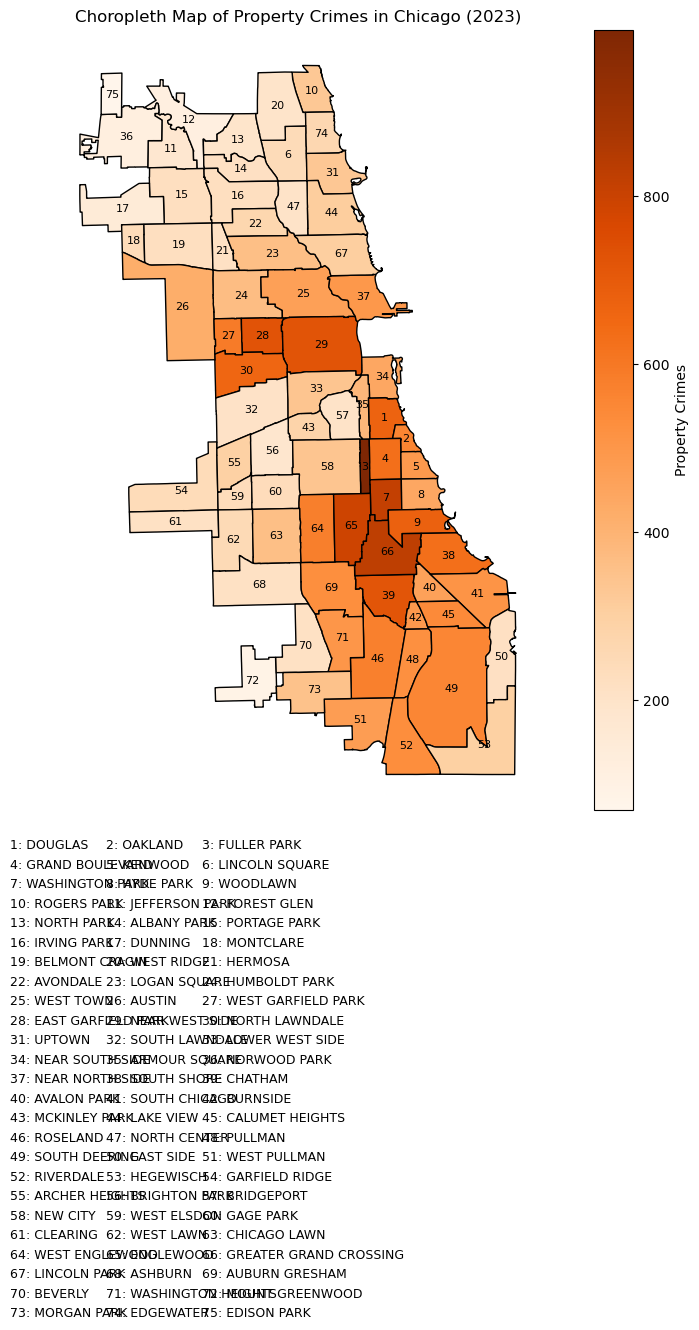

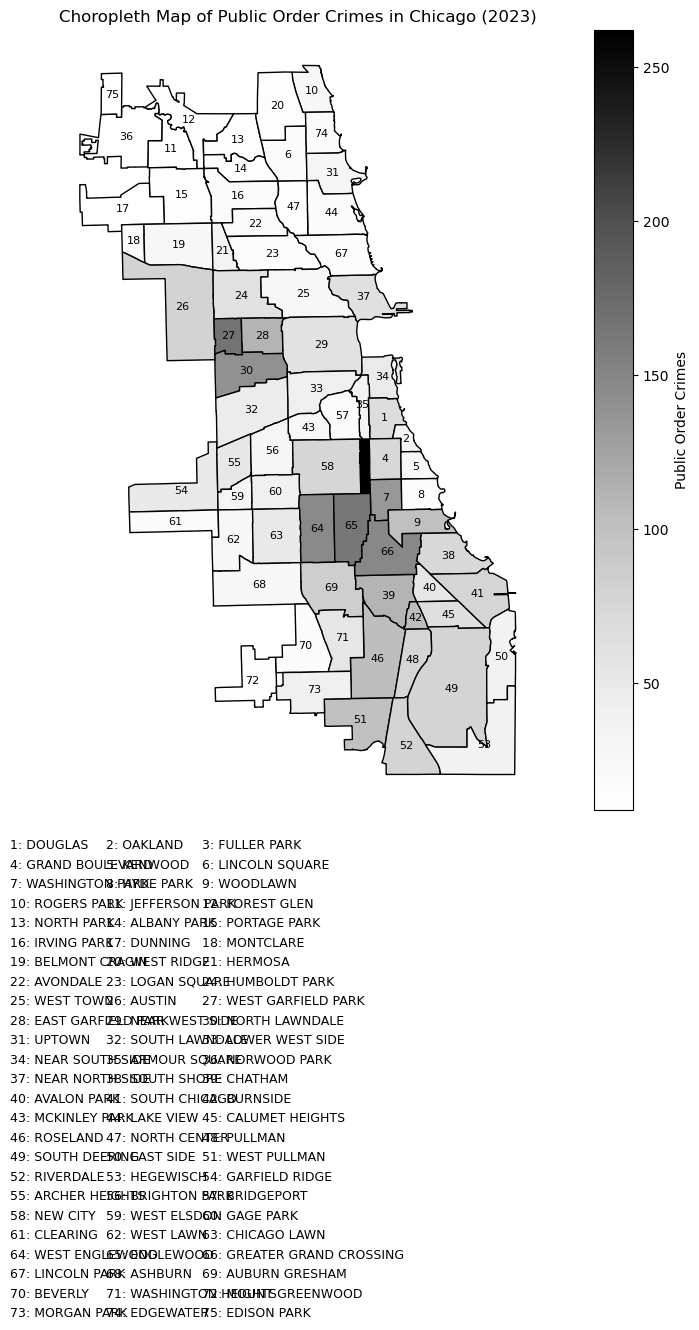

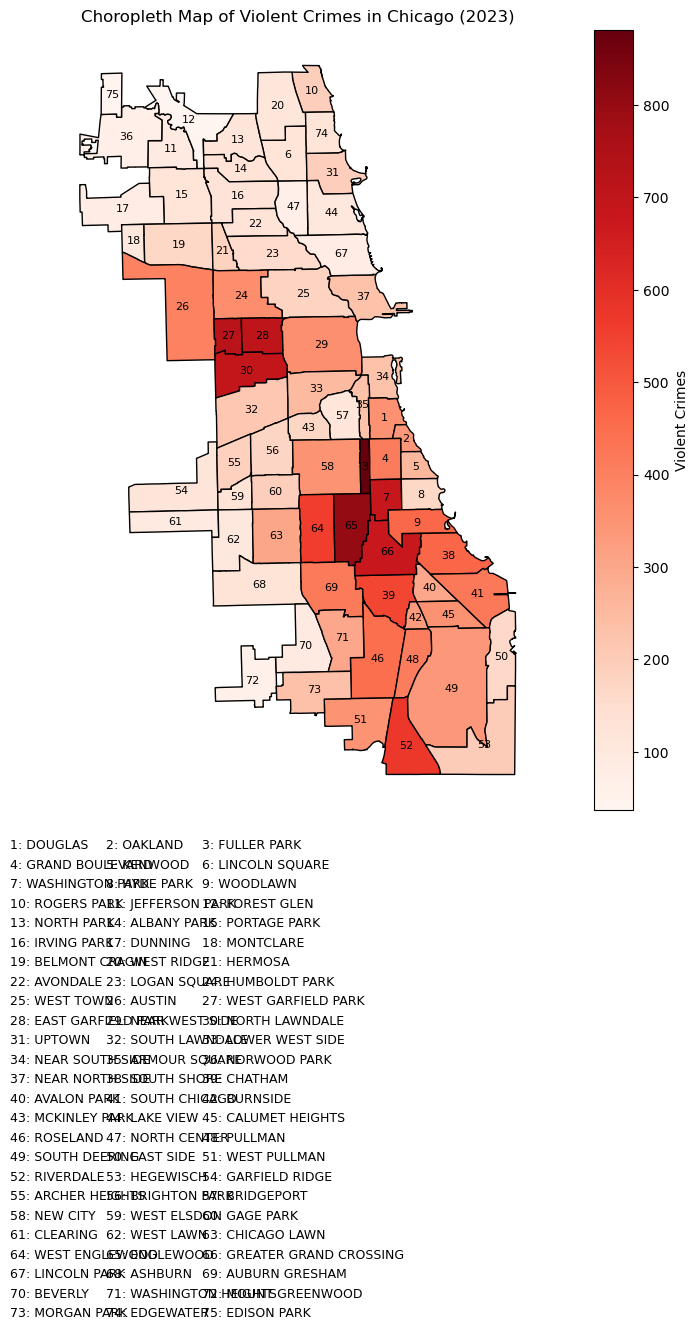

In [14]:
gdf = gpd.read_file('boundries-chicago-community.geojson')

crime_categories = [
    'Crimes Involving Children_per_capita',
    'Deceptive Practices and Fraud_per_capita',
    'Drug-Related Crimes_per_capita', 
    'Property Crimes_per_capita',
    'Public Order Crimes_per_capita', 
    'Violent Crimes_per_capita'
]
color_maps = ['Purples', 'Blues', 'Greens', 'Oranges', 'Greys', 'Reds']

gdf['community'] = gdf['community'].str.upper()

merged_gdf = gdf.merge(monthly_avg_crime_2023, left_on='community', right_on='community')

num_columns = 3
split_communities = [merged_gdf['community'][i::num_columns] for i in range(num_columns)]

for crime_category, cmap in zip(crime_categories, itertools.cycle(color_maps)):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged_gdf.plot(ax=ax, column=crime_category, cmap=cmap, edgecolor='black', legend=True,
                    legend_kwds={'label': crime_category.replace("_per_capita", ""), 'orientation': "vertical"})

    for idx, row in merged_gdf.iterrows():
        plt.annotate(text=str(idx + 1), xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', verticalalignment='center', fontsize=8)
    
    fig_height = fig.get_figheight() * fig.dpi
    y_offset_start = 0.05 * fig_height  
    y_offset_step = 0.025 * fig_height  
    
    for i, communities in enumerate(split_communities):
        for j, community in enumerate(communities):
            idx = i + j * num_columns
            ax.text(-0.1 + 0.2 * i, -0.05 - j * y_offset_step / fig_height,
                    f"{idx + 1}: {community}", transform=ax.transAxes, fontsize=9, ha='left')

    ax.axis('off')
    plt.title(f'Choropleth Map of {crime_category.replace("_per_capita", "").replace("_", " ")} in Chicago (2023)')
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.85)
    plt.show()

## Temporal patterns and crime insights

### Seasonal decomposition of daily crime counts time series

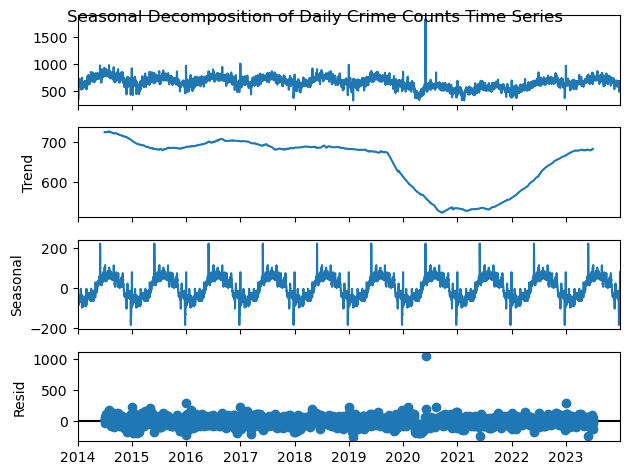

In [15]:
crime_df['date'] = pd.to_datetime(crime_df['date'])
crime_df.set_index('date', inplace=True)

daily_crime_counts = crime_df.resample('D').size()

result = seasonal_decompose(daily_crime_counts, model='additive', period=365)

result.plot()
plt.suptitle('Seasonal Decomposition of Daily Crime Counts Time Series')
plt.show()

crime_df.reset_index(inplace=True)


### Temporal heatmap of crime counts

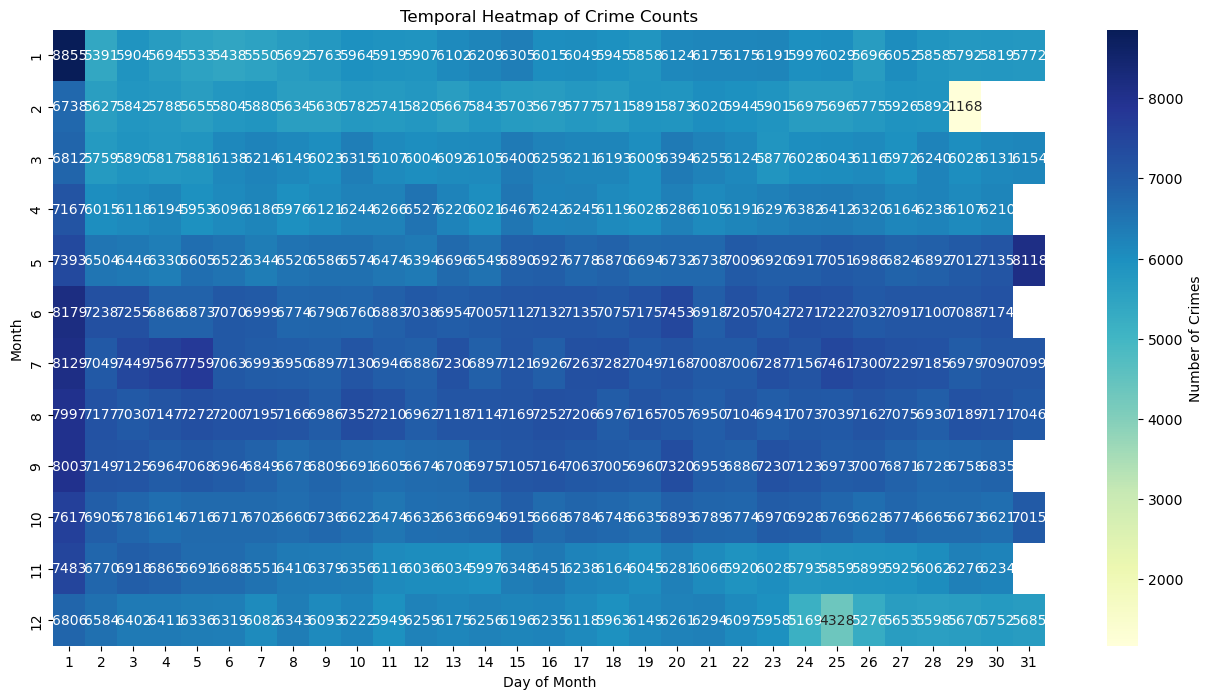

In [16]:
# Extract year, month, and day from the timestamp
crime_df['date'] = pd.to_datetime(crime_df['date'])
crime_df['year'] = crime_df['date'].dt.year
crime_df['month'] = crime_df['date'].dt.month
crime_df['day'] = crime_df['date'].dt.day

# Create a temporal heatmap
crime_temporal_heatmap = crime_df.groupby(['month', 'day']).size().unstack()

plt.figure(figsize=(16, 8))
sns.heatmap(crime_temporal_heatmap, cmap='YlGnBu', fmt='g', annot=True, cbar_kws={'label': 'Number of Crimes'})
plt.title('Temporal Heatmap of Crime Counts')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()

crime_df.reset_index(inplace=True)

### Word cloud for crime descriptions

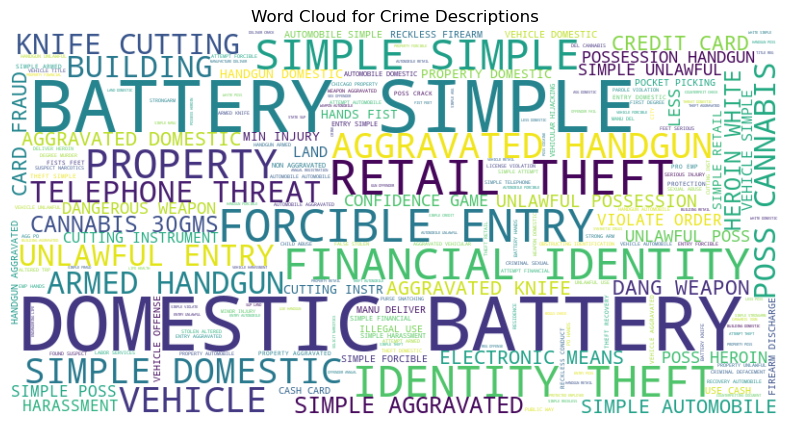

In [17]:
from wordcloud import WordCloud

#Word Cloud for Descriptions
text = ' '.join(crime_df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Crime Descriptions')
plt.show()